In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## データの読み込み

In [3]:
train_x = pd.read_csv("train_x.csv", na_values=["なし"])
train_y = pd.read_csv("train_y.csv" )
test_x = pd.read_csv("test_x.csv", na_values=["なし"])

all_x = pd.concat([train_x, test_x], ignore_index=True, sort=False)
train_y = train_y.drop(columns=["お仕事No."])
all_df = pd.concat([all_x, train_y], axis=1)

# all_df = all_df.drop(columns=["お仕事No."])

C:\Users\ishizuka\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (114) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
all_df.shape

(19244, 213)

## EDA

### 被説明変数

### 全て欠損しているカラム

In [5]:
# すべて欠損しているカラム
allnot_col = list(all_df.isnull().sum()[all_df.isnull().sum()==19244].index)
allnot_col

['勤務地\u3000最寄駅3（駅名）',
 '応募先\u3000名称',
 '勤務地\u3000最寄駅3（沿線名）',
 '（派遣先）勤務先写真コメント',
 '勤務地\u3000最寄駅3（分）',
 '無期雇用派遣',
 '未使用.14',
 '（派遣以外）応募後の流れ',
 '（派遣先）概要\u3000従業員数',
 '電話応対なし',
 '週払い',
 '固定残業制 残業代 下限',
 '未使用.11',
 'フリー項目\u3000内容',
 '先輩からのメッセージ',
 '未使用.10',
 '未使用.8',
 '経験必須',
 '固定残業制 残業代に充当する労働時間数 下限',
 'ブロックコード2',
 '未使用.4',
 '未使用.7',
 'メモ',
 'ブロックコード3',
 'WEB面接OK',
 '17時以降出社OK',
 '寮・社宅あり',
 'ネットワーク関連のスキルを活かす',
 'Wワーク・副業可能',
 '固定残業制 残業代に充当する労働時間数 上限',
 'プログラム関連のスキルを活かす',
 '未使用.15',
 '未使用.12',
 'エルダー（50〜）活躍中',
 '人材紹介',
 '主婦(ママ)・主夫歓迎',
 'ブロックコード1',
 'フリー項目\u3000タイトル',
 '未使用.1',
 'ブランクOK',
 '未使用.20',
 '募集形態',
 '勤務地\u3000最寄駅3（駅からの交通手段）',
 '応募先\u3000最寄駅（沿線名）',
 '仕事写真（下）\u3000写真1\u3000ファイル名',
 '未使用.16',
 '仕事写真（下）\u3000写真3\u3000ファイル名',
 'オープニングスタッフ',
 '応募先\u3000所在地\u3000ブロックコード',
 '応募先\u3000所在地\u3000都道府県',
 '応募先\u3000最寄駅（駅名）',
 '外国人活躍中・留学生歓迎',
 '未使用.17',
 '未使用.9',
 '日払い',
 '未使用',
 '未使用.18',
 '未使用.22',
 '未使用.5',
 '勤務地\u3000周辺情報',
 '仕事写真（下）\u3000写真2\u3000ファイル名',
 'バイク・自転車通勤OK',
 '仕事写真（下）\u3000写真2\u3

In [6]:
# すべて欠損しているカラムは削除
all_df = all_df.drop(columns=allnot_col)
all_df.shape

(19244, 128)

### 値がすべて同じカラム

In [7]:
#それぞれの特徴量データが何種類に分かれるか
pd.DataFrame(all_df.nunique())

,0
職場の様子,3
（紹介予定）入社後の雇用形態,3
勤務地固定,1
休日休暇(月曜日),2
（派遣先）配属先部署 男女比 男,11
勤務地 最寄駅2（駅名）,856
大手企業,2
（紹介予定）雇用形態備考,7
週1日からOK,1
交通費別途支給,2


In [8]:
# 値がすべて同じカラム
one_col = list(all_df.nunique()[all_df.nunique()==1].index)
one_col

['勤務地固定',
 '週1日からOK',
 'ミドル（40〜）活躍中',
 'ルーティンワークがメイン',
 '対象者設定\u3000年齢下限',
 '動画コメント',
 '給与/交通費\u3000給与支払区分',
 'CAD関連のスキルを活かす',
 '固定残業制',
 '公開区分',
 '20代活躍中',
 '検索対象エリア',
 '就業形態区分',
 '30代活躍中',
 '（派遣）応募後の流れ',
 '雇用形態',
 'Dip JobsリスティングS',
 '資格取得支援制度あり',
 '対象者設定\u3000年齢上限',
 '社会保険制度あり',
 '動画タイトル',
 '（派遣先）概要\u3000事業内容',
 '残業月10時間未満',
 '履歴書不要',
 '研修制度あり',
 'DTP関連のスキルを活かす',
 '新卒・第二新卒歓迎',
 '産休育休取得事例あり',
 '動画ファイル名',
 '対象者設定\u3000性別',
 'WEB登録OK']

In [9]:
# 値がすべて同じカラムかつ欠損値を持たないカラムは削除
onefull_col = list(all_df[one_col].isnull().sum()[all_df[one_col].isnull().sum()==0].index)
all_df = all_df.drop(columns=onefull_col)

In [10]:
# 値がすべて同じカラムかつ欠損値を持つカラム
one_col2 = all_df.nunique()[all_df.nunique()==1].index
one_col2

Index(['（派遣先）概要　事業内容'], dtype='object')

### 重複データ
https://note.nkmk.me/python-pandas-duplicated-drop-duplicates/

In [11]:
# データを分割
# ちなみにtestデータで重複している行はない
train = all_df[all_df["応募数 合計"].notnull()]
test = all_df[all_df["応募数 合計"].isnull()]
train.shape

(15853, 98)

In [12]:
train[train.duplicated(subset=["お仕事No."], keep="last")]

,職場の様子,（紹介予定）入社後の雇用形態,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,短時間勤務OK(1日4h以内),駅から徒歩5分以内,学校・公的機関（官公庁）,土日祝のみ勤務,掲載期間 開始日,Wordのスキルを活かす,勤務地 最寄駅1（分）,お仕事No.,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,フラグオプション選択,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),社員食堂あり,（紹介予定）入社時期,お仕事名,10時以降出社OK,期間・時間 勤務開始日,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署,（派遣先）配属先部署 男女比 女,仕事内容,（派遣先）概要 事業内容,休日休暇(土曜日),（紹介予定）年収・給与例,休日休暇(木曜日),勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,掲載期間 終了日,休日休暇(金曜日),お仕事のポイント（仕事PR）,扶養控除内,給与/交通費 給与下限,オフィスが禁煙・分煙,勤務地 市区町村コード,（派遣先）職場の雰囲気,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,期間･時間 備考,応募数 合計
1,3,1.0,0,2.0,淡路町,1,正社員,0,33.0,0,20020,1,0,1,0,0,2019/11/27,1,1.0,2203546900,1,0,0,東京メトロ丸ノ内線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,0,2019/11/26,0,1,0,1018-2.jpg,1,0,経理部,8.0,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ランチに嬉しい社員食堂完備の職場ですよ...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収３５０万円〜（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,45.0,0,28000,13,0,0,0,2000.0,0,1,1.0,【専門・高専卒以上】◆事務経験・簿記３級程度の知識がある方歓迎します。<BR>【使用するＯＡ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪複数路線が利用でき便利！休憩室完備の自社ビル！当社スタッフさん就業中！...,0,1800,1,101,ランチに嬉しい社員食堂完備の職場です！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN,3.951244
2,3,1.0,0,2.0,淡路町,1,正社員,0,33.0,0,20020,1,0,1,0,0,2019/11/27,1,1.0,2203546900,1,0,0,東京メトロ丸ノ内線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,0,2019/11/26,0,1,0,1018-2.jpg,1,0,経理部,8.0,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ランチに嬉しい社員食堂完備の職場ですよ...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収３５０万円〜（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,45.0,0,28000,13,0,0,0,2000.0,0,1,1.0,【専門・高専卒以上】◆事務経験・簿記３級程度の知識がある方歓迎します。<BR>【使用するＯＡ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪複数路線が利用でき便利！休憩室完備の自社ビル！当社スタッフさん就業中！...,0,1800,1,101,ランチに嬉しい社員食堂完備の職場です！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN,3.295837
3,2,1.0,0,8.0,宝町,0,正社員,0,5.0,1,20020,0,0,0,1,0,2019/11/27,1,6.0,2203545344,0,0,0,都営浅草線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:30 <BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都中央区,1,206東京,1,0,◆6ヶ月後,【未経験でも6ヶ月後社員】賞与年4.5ヶ月分＊非営利団体で事務,0,2019/11/26,0,1,0,NaN,1,0,企画調整部,2.0,安心安定の非営利団体！落ち着いた雰囲気の職場環境です！<BR>【ＯＡ事務】<BR>会議や委員...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収２７９〜３５０万円（賞与含２回／年４．５ヶ月分）★,0,東京メトロ日比谷線,42.0,0,30000,13,0,0,0,NaN,0,1,1.0,【大卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（関数）<BR><BR>...,1,年間休日１３７日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆最寄駅から徒歩圏内！複数路線が利用可能！近くにコンビニ・カフェがあり便利！分煙されており快...,0,1650,1,102,落ち着いた雰囲気の職場環境です！<BR>,完備,八丁堀,6.0,【月収例】25万9875円＋残業代（21日勤務の場合）,0,◆開始日はご相談可能です！詳しくはお問い合わせください！,3.970292
4,2,1.0,0,8.0,宝町,0,正社員,0,5.0,1,20020,0,0,0,1,0,2019/11/27,1,6.0,2203545344,0,0,0,都営浅草線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:30 <BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都中央区,1,206東京,1,0,◆6ヶ月後,【未経験でも6ヶ月後社員】賞与年4.5ヶ月分＊非営利団体で事務,0,2019/11/26,0,1,0,NaN,1,0,企画調整部,2.0,安心安定の非営利団体！落ち着いた雰囲気の職場環境です！<BR>【ＯＡ事務】<BR>会議や委員...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収２７９〜３５０万円（賞与含２回／年４．５ヶ月分）★,0,東京メトロ日比谷線,42.0,0,30000,13,0,0,0,NaN,0,1,1.0,【大卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（関数）<BR><BR>...,1,年間休日１３７日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆最寄駅から徒歩圏内！複数路線が利用可能！近くにコンビニ・カフェがあり便利！分煙されており快...,0,1650,1,102,落ち着いた雰囲気の職場環境です！<BR>,完備,八丁堀,6.0,【月収例】25万9875円＋残業代（21日勤務の場合）,0,◆開始日はご相談可能です！詳しくはお問い合わせください！,3.784190
8,3,2.0,0,6.0,NaN,0,契約社員,0,17.0,0,20020,0,0,1,1,0,2019/11/27,1,1.0,2203526826,1,0,0,NaN,0,0,NaN,

In [13]:
# "お仕事No."が同じでちがう項目は開始日や終了日がほとんど
train[train.duplicated(subset=["お仕事No.", "掲載期間　開始日"], keep="last")]

,職場の様子,（紹介予定）入社後の雇用形態,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,短時間勤務OK(1日4h以内),駅から徒歩5分以内,学校・公的機関（官公庁）,土日祝のみ勤務,掲載期間 開始日,Wordのスキルを活かす,勤務地 最寄駅1（分）,お仕事No.,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,フラグオプション選択,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),社員食堂あり,（紹介予定）入社時期,お仕事名,10時以降出社OK,期間・時間 勤務開始日,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署,（派遣先）配属先部署 男女比 女,仕事内容,（派遣先）概要 事業内容,休日休暇(土曜日),（紹介予定）年収・給与例,休日休暇(木曜日),勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,掲載期間 終了日,休日休暇(金曜日),お仕事のポイント（仕事PR）,扶養控除内,給与/交通費 給与下限,オフィスが禁煙・分煙,勤務地 市区町村コード,（派遣先）職場の雰囲気,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,期間･時間 備考,応募数 合計
1,3,1.0,0,2.0,淡路町,1,正社員,0,33.0,0,20020,1,0,1,0,0,2019/11/27,1,1.0,2203546900,1,0,0,東京メトロ丸ノ内線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,0,2019/11/26,0,1,0,1018-2.jpg,1,0,経理部,8.0,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ランチに嬉しい社員食堂完備の職場ですよ...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収３５０万円〜（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,45.0,0,28000,13,0,0,0,2000.0,0,1,1.0,【専門・高専卒以上】◆事務経験・簿記３級程度の知識がある方歓迎します。<BR>【使用するＯＡ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪複数路線が利用でき便利！休憩室完備の自社ビル！当社スタッフさん就業中！...,0,1800,1,101,ランチに嬉しい社員食堂完備の職場です！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN,3.951244
3,2,1.0,0,8.0,宝町,0,正社員,0,5.0,1,20020,0,0,0,1,0,2019/11/27,1,6.0,2203545344,0,0,0,都営浅草線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:30 <BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都中央区,1,206東京,1,0,◆6ヶ月後,【未経験でも6ヶ月後社員】賞与年4.5ヶ月分＊非営利団体で事務,0,2019/11/26,0,1,0,NaN,1,0,企画調整部,2.0,安心安定の非営利団体！落ち着いた雰囲気の職場環境です！<BR>【ＯＡ事務】<BR>会議や委員...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収２７９〜３５０万円（賞与含２回／年４．５ヶ月分）★,0,東京メトロ日比谷線,42.0,0,30000,13,0,0,0,NaN,0,1,1.0,【大卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（関数）<BR><BR>...,1,年間休日１３７日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆最寄駅から徒歩圏内！複数路線が利用可能！近くにコンビニ・カフェがあり便利！分煙されており快...,0,1650,1,102,落ち着いた雰囲気の職場環境です！<BR>,完備,八丁堀,6.0,【月収例】25万9875円＋残業代（21日勤務の場合）,0,◆開始日はご相談可能です！詳しくはお問い合わせください！,3.970292
8,3,2.0,0,6.0,NaN,0,契約社員,0,17.0,0,20020,0,0,1,1,0,2019/11/27,1,1.0,2203526826,1,0,0,NaN,0,0,NaN,NaN,※土・日・祝がお休みです。,3,8:30〜17:15 <BR>※休憩は６０分です。９時〜１７時４５分の勤務も選べます。,5,1,0,0,1,0,0,0,東京都墨田区,1,206東京,1,0,◆6ヶ月後,未経験も6ヶ月後社員[賞与あり]自然にやさしい非営利団体◎事務,0,2019/11/26,0,1,0,NaN,1,1,技術部,4.0,錦糸町駅からすぐ！幅広い年齢層の方＆派遣スタッフが活躍中！残業がほとんどない魅力的なお仕事で...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★契約社員登用後：年収３０６〜３１０万円（賞与含）★※実際の年収等は別途ご確認ください。,0,総武本線,43.0,0,30000,13,0,0,0,NaN,0,3,1.0,【高卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｗｏｒｄ（図・フォーム活用）・Ｅｘ...,1,年間休日１２５日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆同業務就業の方が在籍で安心！オシャレを楽しめるオフィカジＯＫ♪禁煙なのでタバコを吸わない方...,0,1600,1,107,同業務就業の方が在籍で安心です！<BR>,完備,錦糸町,NaN,【月収例】26万400円＋残業代（21日勤務の場合）,1,NaN,3.218876
10,3,1.0,0,3.0,御茶ノ水,1,正社員,0,17.0,0,22030,1,0,1,0,0,2019/11/27,1,1.0,2203501746,1,0,1,中央本線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,【未経験も3ヶ月後正社員へ◎賞与2回】コツコツと*伝票の登録etc,0,2019/11/26,0,1,0,NaN,1,0,本社／総務部,7.0,大手損害保険会社でのオシゴトです！残業ほぼなしでワークライフバランスもバッチリですよ♪<BR...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収約３５０万円（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,40.0,0,28000,13,0,0,0,NaN,0,1,1.0,【短大卒以上】◆事務の経験がある方歓迎します。<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（ＶＬ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪駅直結！複数路線利用可能！自社ビル内に売店・コンビニ・社員食堂有！休憩...,0,1800,1,101,自社ビル内に売店・コンビニ・社員食堂あります！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN,3.218876
12,3,1.0,0,5.0,九段下,0,正社員,0,6.0,1,22020,0,0,1,0,0,2019/11/27,1,6.0,2203519812,0,0,0,東京メトロ半蔵門線,0,0,NaN,1.0

In [14]:
# "応募数 合計"以外すべて一致している行をひとつずつ表示
train.drop(columns=["応募数 合計"])[train.drop(columns=["応募数 合計"]).duplicated(keep="last")]

,職場の様子,（紹介予定）入社後の雇用形態,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,短時間勤務OK(1日4h以内),駅から徒歩5分以内,学校・公的機関（官公庁）,土日祝のみ勤務,掲載期間 開始日,Wordのスキルを活かす,勤務地 最寄駅1（分）,お仕事No.,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,フラグオプション選択,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),社員食堂あり,（紹介予定）入社時期,お仕事名,10時以降出社OK,期間・時間 勤務開始日,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署,（派遣先）配属先部署 男女比 女,仕事内容,（派遣先）概要 事業内容,休日休暇(土曜日),（紹介予定）年収・給与例,休日休暇(木曜日),勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,掲載期間 終了日,休日休暇(金曜日),お仕事のポイント（仕事PR）,扶養控除内,給与/交通費 給与下限,オフィスが禁煙・分煙,勤務地 市区町村コード,（派遣先）職場の雰囲気,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,期間･時間 備考
1,3,1.0,0,2.0,淡路町,1,正社員,0,33.0,0,20020,1,0,1,0,0,2019/11/27,1,1.0,2203546900,1,0,0,東京メトロ丸ノ内線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,0,2019/11/26,0,1,0,1018-2.jpg,1,0,経理部,8.0,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ランチに嬉しい社員食堂完備の職場ですよ...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収３５０万円〜（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,45.0,0,28000,13,0,0,0,2000.0,0,1,1.0,【専門・高専卒以上】◆事務経験・簿記３級程度の知識がある方歓迎します。<BR>【使用するＯＡ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪複数路線が利用でき便利！休憩室完備の自社ビル！当社スタッフさん就業中！...,0,1800,1,101,ランチに嬉しい社員食堂完備の職場です！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN
3,2,1.0,0,8.0,宝町,0,正社員,0,5.0,1,20020,0,0,0,1,0,2019/11/27,1,6.0,2203545344,0,0,0,都営浅草線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:30 <BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都中央区,1,206東京,1,0,◆6ヶ月後,【未経験でも6ヶ月後社員】賞与年4.5ヶ月分＊非営利団体で事務,0,2019/11/26,0,1,0,NaN,1,0,企画調整部,2.0,安心安定の非営利団体！落ち着いた雰囲気の職場環境です！<BR>【ＯＡ事務】<BR>会議や委員...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収２７９〜３５０万円（賞与含２回／年４．５ヶ月分）★,0,東京メトロ日比谷線,42.0,0,30000,13,0,0,0,NaN,0,1,1.0,【大卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（関数）<BR><BR>...,1,年間休日１３７日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆最寄駅から徒歩圏内！複数路線が利用可能！近くにコンビニ・カフェがあり便利！分煙されており快...,0,1650,1,102,落ち着いた雰囲気の職場環境です！<BR>,完備,八丁堀,6.0,【月収例】25万9875円＋残業代（21日勤務の場合）,0,◆開始日はご相談可能です！詳しくはお問い合わせください！
8,3,2.0,0,6.0,NaN,0,契約社員,0,17.0,0,20020,0,0,1,1,0,2019/11/27,1,1.0,2203526826,1,0,0,NaN,0,0,NaN,NaN,※土・日・祝がお休みです。,3,8:30〜17:15 <BR>※休憩は６０分です。９時〜１７時４５分の勤務も選べます。,5,1,0,0,1,0,0,0,東京都墨田区,1,206東京,1,0,◆6ヶ月後,未経験も6ヶ月後社員[賞与あり]自然にやさしい非営利団体◎事務,0,2019/11/26,0,1,0,NaN,1,1,技術部,4.0,錦糸町駅からすぐ！幅広い年齢層の方＆派遣スタッフが活躍中！残業がほとんどない魅力的なお仕事で...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★契約社員登用後：年収３０６〜３１０万円（賞与含）★※実際の年収等は別途ご確認ください。,0,総武本線,43.0,0,30000,13,0,0,0,NaN,0,3,1.0,【高卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｗｏｒｄ（図・フォーム活用）・Ｅｘ...,1,年間休日１２５日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆同業務就業の方が在籍で安心！オシャレを楽しめるオフィカジＯＫ♪禁煙なのでタバコを吸わない方...,0,1600,1,107,同業務就業の方が在籍で安心です！<BR>,完備,錦糸町,NaN,【月収例】26万400円＋残業代（21日勤務の場合）,1,NaN
10,3,1.0,0,3.0,御茶ノ水,1,正社員,0,17.0,0,22030,1,0,1,0,0,2019/11/27,1,1.0,2203501746,1,0,1,中央本線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,【未経験も3ヶ月後正社員へ◎賞与2回】コツコツと*伝票の登録etc,0,2019/11/26,0,1,0,NaN,1,0,本社／総務部,7.0,大手損害保険会社でのオシゴトです！残業ほぼなしでワークライフバランスもバッチリですよ♪<BR...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収約３５０万円（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,40.0,0,28000,13,0,0,0,NaN,0,1,1.0,【短大卒以上】◆事務の経験がある方歓迎します。<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（ＶＬ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪駅直結！複数路線利用可能！自社ビル内に売店・コンビニ・社員食堂有！休憩...,0,1800,1,101,自社ビル内に売店・コンビニ・社員食堂あります！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN
12,3,1.0,0,5.0,九段下,0,正社員,0,6.0,1,22020,0,0,1,0,0,2019/11/27,1,6.0,2203519812,0,0,0,東京メトロ半蔵門線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜18:00 <BR>※休憩は６０分です。,

In [15]:
# グループ化して応募数 合計の平均をとったカラムを追加
train['応募数mean'] = train.groupby(["お仕事No."])["応募数 合計"].transform("mean")
test["応募数mean"] = np.nan
# 全重複数もカラムとして残しておく
all_df = pd.concat([train, test], ignore_index=True, sort=False)
all_df["all_count"] = all_df.groupby(["お仕事No."])["お仕事No."].transform("count")
train = all_df[all_df["応募数mean"].notnull()]
test = all_df[all_df["応募数mean"].isnull()]

train.head()

C:\Users\ishizuka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ishizuka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,職場の様子,（紹介予定）入社後の雇用形態,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,短時間勤務OK(1日4h以内),駅から徒歩5分以内,学校・公的機関（官公庁）,土日祝のみ勤務,掲載期間 開始日,Wordのスキルを活かす,勤務地 最寄駅1（分）,お仕事No.,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,フラグオプション選択,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),社員食堂あり,（紹介予定）入社時期,お仕事名,10時以降出社OK,期間・時間 勤務開始日,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署,（派遣先）配属先部署 男女比 女,仕事内容,（派遣先）概要 事業内容,休日休暇(土曜日),（紹介予定）年収・給与例,休日休暇(木曜日),勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,掲載期間 終了日,休日休暇(金曜日),お仕事のポイント（仕事PR）,扶養控除内,給与/交通費 給与下限,オフィスが禁煙・分煙,勤務地 市区町村コード,（派遣先）職場の雰囲気,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,期間･時間 備考,応募数 合計,応募数mean,all_count
0,3,NaN,0,6.0,NaN,0,NaN,0,12.0,0,22010,1,0,1,1,0,2019/11/27,1,3.0,2203566799,1,0,0,NaN,0,0,NaN,NaN,※土・日・祝がお休みです。※企業カレンダーあります。,1,9:30〜16:30 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,0,0,0,1,0,0,0,東京都足立区,1,206東京,1,1,NaN,ほぼ１６時半終業☆大学＊申請受付ｅｔｃ！未経験スタートＯＫ☆,0,2020/1/6,0,1,0,NaN,1,0,事務処理を行う部署,4.0,１月スタート！実働短め☆残業ほとんどなし×基本土日祝お休み！朝は少しゆっくりの９：３０出勤で...,NaN,1,NaN,0,東京メトロ千代田線,45.0,0,30000,13,0,0,0,NaN,0,2,1.0,◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（ＶＬＯＯＫ関数）<BR><BR>▼...,0,NaN,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆駅からスグ！飲食店・コンビニが近く便利！職場環境ＧＯＯＤ◎！当社含む派遣スタッフ多数活躍中...,0,1550,1,121,当社スタッフ活躍中です！<BR>,NaN,北千住,NaN,【月収例】19万5300円＋残業代（21日勤務の場合）,1,◆開始日はご相談可能です！詳しくはお問い合わせください！,1.945910,1.945910,1
1,3,1.0,0,2.0,淡路町,1,正社員,0,33.0,0,20020,1,0,1,0,0,2019/11/27,1,1.0,2203546900,1,0,0,東京メトロ丸ノ内線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,0,2019/11/26,0,1,0,1018-2.jpg,1,0,経理部,8.0,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ランチに嬉しい社員食堂完備の職場ですよ...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収３５０万円〜（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,45.0,0,28000,13,0,0,0,2000.0,0,1,1.0,【専門・高専卒以上】◆事務経験・簿記３級程度の知識がある方歓迎します。<BR>【使用するＯＡ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪複数路線が利用でき便利！休憩室完備の自社ビル！当社スタッフさん就業中！...,0,1800,1,101,ランチに嬉しい社員食堂完備の職場です！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN,3.951244,3.623540,5
2,3,1.0,0,2.0,淡路町,1,正社員,0,33.0,0,20020,1,0,1,0,0,2019/11/27,1,1.0,2203546900,1,0,0,東京メトロ丸ノ内線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,0,2019/11/26,0,1,0,1018-2.jpg,1,0,経理部,8.0,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ランチに嬉しい社員食堂完備の職場ですよ...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収３５０万円〜（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,45.0,0,28000,13,0,0,0,2000.0,0,1,1.0,【専門・高専卒以上】◆事務経験・簿記３級程度の知識がある方歓迎します。<BR>【使用するＯＡ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪複数路線が利用でき便利！休憩室完備の自社ビル！当社スタッフさん就業中！...,0,1800,1,101,ランチに嬉しい社員食堂完備の職場です！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN,3.295837,3.623540,5
3,2,1.0,0,8.0,宝町,0,正社員,0,5.0,1,20020,0,0,0,1,0,2019/11/27,1,6.0,2203545344,0,0,0,都営浅草線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:30 <BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都中央区,1,206東京,1,0,◆6ヶ月後,【未経験でも6ヶ月後社員】賞与年4.5ヶ月分＊非営利団体で事務,0,2019/11/26,0,1,0,NaN,1,0,企画調整部,2.0,安心安定の非営利団体！落ち着いた雰囲気の職場環境です！<BR>【ＯＡ事務】<BR>会議や委員...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収２７９〜３５０万円（賞与含２回／年４．５ヶ月分）★,0,東京メトロ日比谷線,42.0,0,30000,13,0,0,0,NaN,0,1,1.0,【大卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（関数）<BR><BR>...,1,年間休日１３７日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆最寄駅から徒歩圏内！複数路線が利用可能！近くにコンビニ・カフェがあり便利！分煙されており快...,0,1650,1,102,落ち着いた雰囲気の職場環境です！<BR>,完備,八丁堀,6.0,【月収例】25万9875円＋残業代（21日勤務の場合）,0,◆開始日はご相談可能です！詳しくはお問い合わせください！,3.970292,3.877241,5
4,2,1.0,0,8.0,宝町,0,正社員,0,5.0,1,20020,0,0,0,1,0,2019/11/27,1,6.0,2203

In [16]:
train = train.drop(columns=["応募数 合計"])
test = test.drop(columns=["応募数 合計"])

train = train.drop_duplicates(subset=["お仕事No."])
train.shape

(9671, 99)

In [17]:
all_df = pd.concat([train, test], ignore_index=True, sort=False)
all_df.shape

(13062, 99)

## 特徴量エンジニアリング

### 行ごとの欠損値の数

In [18]:
# 欠損している数を表すカラムを追加
all_df["NaN_num"] = all_df.isnull().sum(axis=1)

### カラムごとに欠損かどうかを表す2値変数

In [19]:
no_df = pd.DataFrame({"num": all_df.isnull().sum()[all_df.isnull().sum()>0].values,
                      "type": all_df[all_df.isnull().sum()[all_df.isnull().sum()>0].index].dtypes},
                      index=all_df.isnull().sum()[all_df.isnull().sum()>0].index)

no_df

,num,type
（紹介予定）入社後の雇用形態,11335,float64
（派遣先）配属先部署 男女比 男,1685,float64
勤務地 最寄駅2（駅名）,6255,object
（紹介予定）雇用形態備考,11335,object
（派遣先）配属先部署 人数,1670,float64
勤務地 最寄駅1（分）,622,float64
勤務地 最寄駅2（沿線名）,6255,object
（派遣先）概要 勤務先名（漢字）,12436,object
勤務地 最寄駅2（駅からの交通手段）,6332,float64
（紹介予定）入社時期,11335,object


In [20]:
all_df.loc[:,no_df.index].nunique()

（紹介予定）入社後の雇用形態           3
（派遣先）配属先部署　男女比　男        11
勤務地　最寄駅2（駅名）           856
（紹介予定）雇用形態備考             7
（派遣先）配属先部署　人数          115
勤務地　最寄駅1（分）             30
勤務地　最寄駅2（沿線名）          221
（派遣先）概要　勤務先名（漢字）        86
勤務地　最寄駅2（駅からの交通手段）       3
（紹介予定）入社時期               7
（派遣先）勤務先写真ファイル名         45
（派遣先）配属先部署　男女比　女        11
（派遣先）概要　事業内容             1
（紹介予定）年収・給与例          1237
勤務地　最寄駅1（沿線名）          351
（派遣先）配属先部署　平均年齢         50
給与/交通費　給与上限            125
勤務地　最寄駅1（駅からの交通手段）       3
（紹介予定）休日休暇              48
（派遣先）職場の雰囲気            936
（紹介予定）待遇・福利厚生          115
勤務地　最寄駅1（駅名）          1747
勤務地　最寄駅2（分）             32
給与/交通費　備考              573
期間･時間　備考                 7
応募数mean                221
dtype: int64

In [21]:
# all_df["NaN_16180"] = np.where(all_df["（紹介予定）入社後の雇用形態"].isnull(), 1, 0)

# 欠損かどうかを表すカラムを追加
for i in no_df.index:
    all_df["NaN_"+i] = np.where(all_df[i].isnull(), 1, 0)

all_df = all_df.drop(columns=["（派遣先）概要　事業内容","NaN_応募数mean"])

### 欠損値
GDBTライブラリを使う場合は欠損値の補完はしない

In [22]:
pd.set_option('display.max_rows', 500)

df  = pd.DataFrame({"num": all_df.isnull().sum().values,
                    "type": all_df.dtypes},
                    index=all_df.columns)
df

,num,type
職場の様子,0,int64
（紹介予定）入社後の雇用形態,11335,float64
休日休暇(月曜日),0,int64
（派遣先）配属先部署 男女比 男,1685,float64
勤務地 最寄駅2（駅名）,6255,object
大手企業,0,int64
（紹介予定）雇用形態備考,11335,object
交通費別途支給,0,int64
（派遣先）配属先部署 人数,1670,float64
残業月20時間以上,0,int64


In [23]:
no_df = pd.DataFrame({"num": all_df.isnull().sum()[all_df.isnull().sum()>0].values,
                      "type": all_df[all_df.isnull().sum()[all_df.isnull().sum()>0].index].dtypes},
                      index=all_df.isnull().sum()[all_df.isnull().sum()>0].index)

no_df

,num,type
（紹介予定）入社後の雇用形態,11335,float64
（派遣先）配属先部署 男女比 男,1685,float64
勤務地 最寄駅2（駅名）,6255,object
（紹介予定）雇用形態備考,11335,object
（派遣先）配属先部署 人数,1670,float64
勤務地 最寄駅1（分）,622,float64
勤務地 最寄駅2（沿線名）,6255,object
（派遣先）概要 勤務先名（漢字）,12436,object
勤務地 最寄駅2（駅からの交通手段）,6332,float64
（紹介予定）入社時期,11335,object


<BarContainer object of 25 artists>

C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27966 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36963 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32

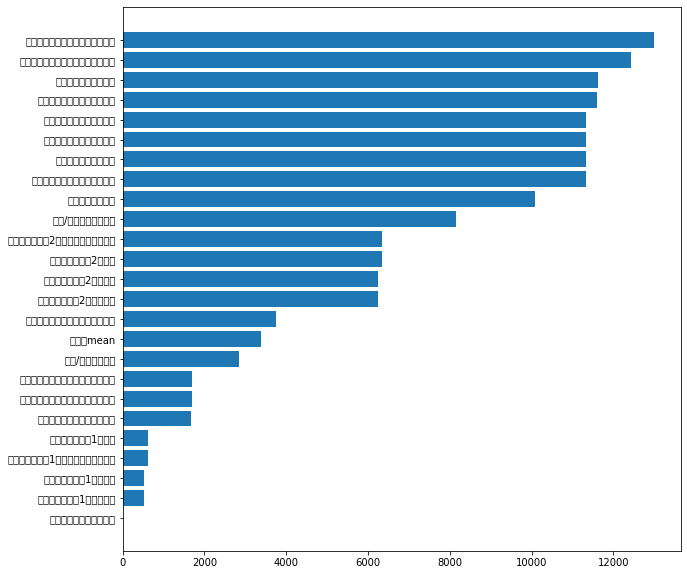

In [24]:
sorted_index = np.argsort(no_df["num"])[::1]

plt.figure(figsize=(10,10))
plt.barh(no_df.index[sorted_index], no_df["num"][sorted_index] )

In [25]:
# 欠損している数値カラム
no_float_col = list(no_df[no_df["type"] != "object"].index)
no_float_col.remove("応募数mean")

# 欠損しているカテゴリカラム
no_obj_col = list(no_df[no_df["type"] == "object"].index)

#### float

In [26]:
no_df.loc[no_float_col,:]

,num,type
（紹介予定）入社後の雇用形態,11335,float64
（派遣先）配属先部署 男女比 男,1685,float64
（派遣先）配属先部署 人数,1670,float64
勤務地 最寄駅1（分）,622,float64
勤務地 最寄駅2（駅からの交通手段）,6332,float64
（派遣先）配属先部署 男女比 女,1685,float64
（派遣先）配属先部署 平均年齢,3746,float64
給与/交通費 給与上限,8153,float64
勤務地 最寄駅1（駅からの交通手段）,622,float64
勤務地 最寄駅2（分）,6332,float64


In [27]:
all_df.corr()[no_float_col][abs(all_df.corr()[no_float_col]) > 0.1]

,（紹介予定）入社後の雇用形態,（派遣先）配属先部署 男女比 男,（派遣先）配属先部署 人数,勤務地 最寄駅1（分）,勤務地 最寄駅2（駅からの交通手段）,（派遣先）配属先部署 男女比 女,（派遣先）配属先部署 平均年齢,給与/交通費 給与上限,勤務地 最寄駅1（駅からの交通手段）,勤務地 最寄駅2（分）
職場の様子,0.101371,NaN,NaN,NaN,NaN,NaN,-0.119807,NaN,NaN,NaN
（紹介予定）入社後の雇用形態,1.000000,-0.137424,0.181031,NaN,NaN,0.137424,NaN,NaN,NaN,NaN
休日休暇(月曜日),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
（派遣先）配属先部署 男女比 男,-0.137424,1.000000,NaN,NaN,NaN,-1.000000,0.192799,NaN,0.111601,NaN
大手企業,0.192758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
交通費別途支給,NaN,NaN,NaN,NaN,0.104895,NaN,NaN,-0.159710,NaN,NaN
（派遣先）配属先部署 人数,0.181031,NaN,1.000000,NaN,NaN,NaN,-0.102893,NaN,NaN,NaN
残業月20時間以上,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
職種コード,-0.126745,NaN,NaN,NaN,NaN,NaN,NaN,0.115593,NaN,NaN
1日7時間以下勤務OK,0.271299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# sns.pairplot(all_df[no_float_col + ["応募数mean"]], plot_kws={'alpha': 0.2})

#### 男女比　女は削除

In [29]:
all_df = all_df.drop(columns=["（派遣先）配属先部署　男女比　女", "NaN_（派遣先）配属先部署　男女比　女"])
all_df.shape

(13062, 122)

#### カテゴリ変数と考えられるものはNAで補完

In [30]:
# cols = ["（紹介予定）入社後の雇用形態", "勤務地　最寄駅2（駅からの交通手段）",
#         "勤務地　最寄駅1（駅からの交通手段）"
#        ]
# for col in cols:
#     all_df[col] = all_df[col].fillna("NA")

#### 数値変数として扱いたいものは-9999で補完

In [31]:
# cols2 = ["（派遣先）配属先部署　男女比　男", "（派遣先）配属先部署　人数",
#          "勤務地　最寄駅1（分）", "（派遣先）配属先部署　平均年齢", 
#          "給与/交通費　給与上限", "勤務地　最寄駅2（分）"
#         ]

# for col in cols2:
#     all_df[col] = all_df[col].fillna(-9999)

#### （紹介予定）入社後の雇用形態 

In [32]:
# plt.scatter(all_df["正社員登用あり"], all_df["（紹介予定）入社後の雇用形態"], alpha=0.01)
# plt.xlabel("正社員登用あり")
# plt.ylabel("（紹介予定）入社後の雇用形態")

In [33]:
# # 欠損値はすべて"正社員登用あり"==0.0
# # 2.0で埋める
# all_df["（紹介予定）入社後の雇用形態"][all_df["正社員登用あり"]==0.0] = all_df["（紹介予定）入社後の雇用形態"][all_df["正社員登用あり"]==0.0].fillna(2.0)

# all_df["（紹介予定）入社後の雇用形態"].value_counts()
# 0.0と2.0を見分ける方法を探す

In [34]:
# for col in no_float_col:
#     all_df[col] = all_df[col].fillna(all_df[col].median())

#### object

In [35]:
no_df.loc[no_obj_col,:]

,num,type
勤務地 最寄駅2（駅名）,6255,object
（紹介予定）雇用形態備考,11335,object
勤務地 最寄駅2（沿線名）,6255,object
（派遣先）概要 勤務先名（漢字）,12436,object
（紹介予定）入社時期,11335,object
（派遣先）勤務先写真ファイル名,12991,object
（紹介予定）年収・給与例,11335,object
勤務地 最寄駅1（沿線名）,519,object
（紹介予定）休日休暇,11611,object
（派遣先）職場の雰囲気,2,object


In [36]:
# for col in no_obj_col:
#     all_df[col] = all_df[col].fillna("NA")

In [37]:
all_df.isnull().sum()[all_df.isnull().sum()>0]

（紹介予定）入社後の雇用形態        11335
（派遣先）配属先部署　男女比　男       1685
勤務地　最寄駅2（駅名）           6255
（紹介予定）雇用形態備考          11335
（派遣先）配属先部署　人数          1670
勤務地　最寄駅1（分）             622
勤務地　最寄駅2（沿線名）          6255
（派遣先）概要　勤務先名（漢字）      12436
勤務地　最寄駅2（駅からの交通手段）     6332
（紹介予定）入社時期            11335
（派遣先）勤務先写真ファイル名       12991
（紹介予定）年収・給与例          11335
勤務地　最寄駅1（沿線名）           519
（派遣先）配属先部署　平均年齢        3746
給与/交通費　給与上限            8153
勤務地　最寄駅1（駅からの交通手段）      622
（紹介予定）休日休暇            11611
（派遣先）職場の雰囲気               2
（紹介予定）待遇・福利厚生         11590
勤務地　最寄駅1（駅名）            519
勤務地　最寄駅2（分）            6332
給与/交通費　備考              2854
期間･時間　備考              10070
応募数mean                3391
dtype: int64

### 数値変数をカテゴリ変数に

In [38]:
# float_col = all_df.dtypes[all_df.dtypes!="object"].index
# obj_col = all_df.dtypes[all_df.dtypes=="object"].index
# f = pd.DataFrame(all_df[float_col].nunique()[all_df[float_col].nunique()>2])
# o = pd.DataFrame(all_df[obj_col].nunique())
# pd.concat([f, o]).to_csv("df.csv", encoding='utf_8_sig')

In [39]:
float_col = all_df.dtypes[all_df.dtypes!="object"].index
obj_col = all_df.dtypes[all_df.dtypes=="object"].index

In [40]:
all_df[float_col].nunique()[all_df[float_col].nunique()>2]

職場の様子                     3
（紹介予定）入社後の雇用形態            3
（派遣先）配属先部署　男女比　男         11
（派遣先）配属先部署　人数           115
職種コード                    14
勤務地　最寄駅1（分）              30
お仕事No.                10975
勤務地　最寄駅2（駅からの交通手段）        3
フラグオプション選択                5
（派遣先）配属先部署　平均年齢          50
会社概要　業界コード               13
勤務地　都道府県コード              47
給与/交通費　給与上限             125
仕事の仕方                     5
勤務地　最寄駅1（駅からの交通手段）        3
給与/交通費　給与下限             139
勤務地　市区町村コード             151
勤務地　最寄駅2（分）              32
応募数mean                 221
all_count                 6
NaN_num                  23
dtype: int64

In [41]:
for col in ["フラグオプション選択", "職種コード", "会社概要　業界コード", "仕事の仕方", "勤務地　市区町村コード"]:
    all_df[col] = all_df[col].astype(str)

## 時系列データ
https://note.nkmk.me/python-pandas-datetime-timestamp/

able_code

### 掲載開始日と勤務開始日

In [45]:
all_df['掲載期間　開始日'] = pd.to_datetime(all_df['掲載期間　開始日'], format="%Y/%m/%d")
all_df['掲載期間　終了日'] = pd.to_datetime(all_df['掲載期間　終了日'], format="%Y/%m/%d")
all_df['期間・時間　勤務開始日'] = pd.to_datetime(all_df['期間・時間　勤務開始日'], format="%Y/%m/%d")

# "勤務開始-掲載開始"カラムを追加
all_df["勤務開始-掲載開始"] = (all_df['期間・時間　勤務開始日'] - all_df['掲載期間　開始日'])
# 日数を取り出す
all_df["勤務開始-掲載開始"] = all_df["勤務開始-掲載開始"].dt.days
all_df["勤務開始-掲載開始"].head()

0    40
1    -1
2    -1
3    -1
4    -1
Name: 勤務開始-掲載開始, dtype: int64

In [46]:
all_df = all_df.drop(columns=['掲載期間　開始日', "掲載期間　終了日", "期間・時間　勤務開始日"])
all_df.shape

(13062, 120)

### 勤務時間関連
https://niwakomablog.com/python-number-extract/

In [47]:
all_df["期間・時間　勤務時間"].value_counts()[all_df["期間・時間　勤務時間"].value_counts()>10]

9:00〜17:30　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          927
9:00〜18:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          910
9:00〜17:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          842
8:30〜17:30　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          354
9:30〜18:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          215
10:00〜19:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。         206
9:00〜17:45　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          182
9:30〜17:30　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          169
10:00〜18:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。         167
8:30〜17:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          149
10:00〜16:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。         142
8:30〜17:15　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          136
9:30〜18:30　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          135
10:00〜17:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。         132
9:00〜17:30　<BR>※残業はほとんどありません。<BR>※休憩は４５分です。          116
8:00〜17:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          114
9:00〜18:00　<BR>※休憩は６０分です。                             97
9:00〜17:30　<BR>※休憩は６０分です。      

In [48]:
all_df["workingstart"] = all_df["期間・時間　勤務時間"].str.split("〜", expand=True)[0]
all_df["workingend"] = all_df["期間・時間　勤務時間"].str.split("〜", expand=True)[1].str.split("　", expand=True)[0]

# datetime型に変換
all_df["workingstart"] = pd.to_datetime(all_df['workingstart'], format='%H:%M')
all_df["workingend"] = pd.to_datetime(all_df['workingend'], format='%H:%M')
all_df["workingstart"].head()

0   1900-01-01 09:30:00
1   1900-01-01 09:00:00
2   1900-01-01 09:00:00
3   1900-01-01 09:00:00
4   1900-01-01 08:30:00
Name: workingstart, dtype: datetime64[ns]

In [49]:
# 勤務時間(分)
all_df["workingtime_m"] = (all_df["workingend"] - all_df["workingstart"]).astype('timedelta64[m]') 
all_df["workingtime_m"].head()

0    420.0
1    480.0
2    510.0
3    520.0
4    480.0
Name: workingtime_m, dtype: float64

In [50]:
#all_df["workrest"] = all_df["期間・時間　勤務時間"].apply(mojimoji.zen_to_han)

# 休憩と<BD>,分に挟まれた文字列を抽出
all_df["workingrest"] = all_df["期間・時間　勤務時間"].str.split("休憩", expand=True)[1].str.split("分", expand=True)[0].str.split("<BR>", expand=True)[0]
# 文字列から数字を抽出
import re
all_df["workingrest"] = all_df["workingrest"].apply(lambda x: re.sub(r'\D', '', str(x)))

# 例外を変換
all_df["workingrest"][all_df["workingrest"]==""] = "０"
all_df["workingrest"][all_df["workingrest"]=="１"] = "６０"
all_df["workingrest"][all_df["workingrest"]=="６０９０"] = "７５"
all_df["workingrest"][all_df["workingrest"]=="１３３０１６００"] = "０"
all_df["workingrest"][all_df["workingrest"]=="１０３０１３３０"] = "０"

# intに変換
all_df["workingrest"] = all_df["workingrest"].apply(int)

C:\Users\ishizuka\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ishizuka\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ishizuka\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [51]:
all_df["workingrest"].head()

0    60
1    60
2    60
3    60
4    60
Name: workingrest, dtype: int64

In [52]:
# 実働時間(分)
all_df["productiontime_m"] = (all_df["workingtime_m"] - all_df["workingrest"])#.astype('timedelta64[m]') 
all_df["productiontime_m"].head()

0    360.0
1    420.0
2    450.0
3    460.0
4    420.0
Name: productiontime_m, dtype: float64

In [53]:
# datetime型のカラムをobject型に変換
for i in list(all_df.dtypes[all_df.dtypes=="datetime64[ns]"].index):
    all_df[i] = all_df[i].astype(str) 

In [54]:
#all_df = all_df.drop(columns=["期間・時間　勤務時間"])

### 期間･時間　備考

In [55]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [56]:
all_df["期間･時間　備考"].value_counts(dropna=False)

NaN                               10070
◆開始日はご相談可能です！詳しくはお問い合わせください！       2949
◆開始日はご相談可能です。詳しくはお問い合せください！          23
◆開始日はご相談可能です。詳しくはお問合せください！            7
◆開始日はご相談可能です！詳しくはお問い合せください！           7
◆開始日はご相談可能です！詳しくはお問合せください！            4
◆開始日はご相談可能です。詳しくはお気軽にお問合せください！        1
◆開始日はご相談可能です！詳しくはお問い合わせ下さい！           1
Name: 期間･時間　備考, dtype: int64

In [57]:
# NaN_期間･時間　備考を追加したので削除
all_df = all_df.drop(columns=["期間･時間　備考"])

## 言語処理
(Janomeで日本語の形態素解析)https://note.nkmk.me/python-janome-tutorial/

(janomeで名詞をいい感じに取り出す)https://qiita.com/Hiroyuki1993/items/42273d805c7ddf5a64d2

(文字列を置換)https://note.nkmk.me/python-str-replace-translate-re-sub/

### お仕事名

In [58]:
all_df["お仕事名"].value_counts(dropna=False)[all_df["お仕事名"].value_counts(dropna=False)>1]

◆正社員前提☆賞与年２回／５ヶ月！バックオフィス業務全般◆       4
時給1700円！１７時半で帰れる！食品商社でのアシスタント★      3
交通費支給あり！ピタッと１７時に帰れる！未経験でも大丈夫！       3
定時に帰れる☆未経験スタートＯＫ！問い合わせ対応ｅｔｃ‥        3
★残業少なめで魅力的★システム開発会社／データ入力など！        3
                                   ..
‥２名の募集‥残業は少なめ☆未経験ＯＫ☆受発注業務ｅｔｃ！       2
未経験も6ヶ月後正社員[賞与2回]残業なし◎伝票整理など＠駅直結    2
●週３日勤務●ピタッと１６時退社！インサイドセールス代行業務      2
未経験でも6ヶ月後社員◎わくわく!イベント運営会社*データ管理     2
◎実働６Ｈ＊１７時まで◎チームアシスタント＠時給1700円       2
Name: お仕事名, Length: 1938, dtype: int64

In [59]:
import string
string.punctuation + "◆▼★②●☆■★【】『』「」、♪"

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~◆▼★②●☆■★【】『』「」、♪'

In [60]:
# Janome で形態素解析
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.charfilter import *
from janome.tokenfilter import *


char_filters = [UnicodeNormalizeCharFilter(),
                RegexReplaceCharFilter(r"[!$%&\'()*+,-./:;<=>?@\\^_`{|}~◆▼★②●☆■★【】『』「」、♪≪≫]", " ")
               ]

tokenizer = Tokenizer()

token_filters = [CompoundNounFilter(),
                 POSKeepFilter(['名詞']),
                 LowerCaseFilter()
                 #,ExtractAttributeFilter('surface') # これを付けるとエラーが出る
                ]

a = Analyzer(char_filters=char_filters,  token_filters=token_filters)

In [61]:
%%time
all_df['お仕事名_token'] = all_df["お仕事名"].apply(lambda x: " ".join([token.surface for token in a.analyze(x)]))
all_df["お仕事名_token"].head()

Wall time: 51.8 s


0      16時半終業 大学 申請受付etc 経験スタートok
1          3ヶ月後正社員 大手損保会社 事務 社員食堂
2    未経験 6ヶ月後社員 賞与年4 5ヶ月分 営利団体 事務
3       正社員前提 年収383万円以上 賞与2回 7ヶ月分
4            16時半 学校法人 窓口 受付 経験ok
Name: お仕事名_token, dtype: object

In [62]:
# BoW を計算
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
bags = vect.fit_transform(all_df['お仕事名_token'])

bags

<13062x6929 sparse matrix of type '<class 'numpy.int64'>'
	with 58651 stored elements in Compressed Sparse Row format>

In [63]:
# tf-idf変換と予測
from sklearn.feature_extraction.text import TfidfTransformer

y = all_df["応募数mean"][all_df["応募数mean"].notnull()]
X = bags[:len(y)]

pipe_1 = make_pipeline(TfidfTransformer(norm='l2'),
                       Lasso(max_iter=10000, random_state=4))

param_grid = {"lasso__alpha": [0.0001, 0.0005]}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_1 = GridSearchCV(pipe_1, param_grid=param_grid, cv=kfold,
                      scoring="neg_mean_squared_error", n_jobs=-1)
grid_1.fit(X, y)

print(grid_1.best_params_)
print(np.sqrt(-grid_1.best_score_))

{'lasso__alpha': 0.0001}
0.6193704612858438


In [64]:
# 予測値を特徴量に追加
all_df["お仕事名_pred"] = grid_1.predict(bags)

all_df["お仕事名_pred"]

0        0.976537
1        1.500810
2        1.487396
3        0.621543
4        0.741246
           ...   
13057    0.516079
13058    0.386137
13059    0.326981
13060    0.438645
13061    0.566950
Name: お仕事名_pred, Length: 13062, dtype: float64

In [65]:
# # pickle

# y = all_df["応募数mean"][all_df["応募数mean"].notnull()]
# X = all_df['お仕事名_token'][:len(y)]
# pipe_1 = make_pipeline(CountVectorizer(),
#                        TfidfTransformer(norm='l2'),
#                        Lasso(max_iter=10000, random_state=4))

# param_grid = {"lasso__alpha": [0.0001]}
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# grid_1 = GridSearchCV(pipe_1, param_grid=param_grid, cv=kfold,
#                       scoring="neg_mean_squared_error", n_jobs=-1)
# grid_1.fit(X, y)

# import pickle
# with open("grid_1.pickle", mode="wb") as f:
#     pickle.dump(grid_1, f)

In [66]:
#all_df = all_df.drop(columns=['お仕事名_token'])

### 仕事内容

In [67]:
all_df["仕事内容"].value_counts(dropna=False)[all_df["仕事内容"].value_counts(dropna=False)>1]

経験活かして働こう！幅広い世代の方が活躍されています！<BR>【お願いしたいお仕事の内容】<BR>後方事務・窓口業務として口座開設、預金入出金、公共料金受付、伝票処理、国内為替業務などをお願いします。<BR><BR>▼こちらのお仕事のほかにも多数あります▼<BR>大手・有名企業から公的機関まで<BR>業界・職種・勤務地も幅広くご用意しています◎<BR>勤務スタート日はご相談OK！<BR>今なら11月・12月スタートのお仕事もたくさん＊                                                                                                                      3
経験活かして働こう！幅広い世代の方が活躍されています！<BR>【お願いしたいお仕事の内容】<BR>後方事務・窓口業務として口座開設、預金入出金、公共料金受付、伝票処理、国内為替業務などをお願いします。<BR><BR>▼こちらのお仕事のほかにも多数あります▼<BR>大手・有名企業から公的機関まで<BR>業界・職種・勤務地も幅広くご用意しています◎<BR>勤務スタート日はご相談OK！<BR>今なら12月・1月スタートのお仕事もたくさん＊                                                                                                                       3
＜保険会社＞幅広い年齢層の方が活躍中！同業務の方も多数いるので安心して就業可能ですよ！<BR>【お仕事の内容】<BR>営業拠点からの連絡内容に応じた申込書・変更届書の作成、営業拠点から提出された申込書・変更届書のチェック・入力、個別案件に関する営業拠点からの照会への回答、電話応対、メール管理、コピー対応、ファイリングなどをお願いします。<BR><BR>▼こちらのお仕事のほかにも多数あります▼<BR>大手・有名企業から公的機関まで<BR>業界・職種・勤務地も幅広くご用意しています◎<BR>勤務スタート日はご相談OK！<BR>今なら10月・11月スタートのお仕事もたくさん＊                                  

In [68]:
%%time
# Janome で形態素解析
char_filters = [UnicodeNormalizeCharFilter(),
                RegexReplaceCharFilter(r"[!$%&\'()*+,-./:;<=>?@\\^_`{|}~◆▼★②●☆■★【】『』「」、♪≪≫]", " ")
               ]

tokenizer = Tokenizer()

token_filters = [CompoundNounFilter(),
                 POSKeepFilter(['名詞']),
                 LowerCaseFilter()
                 #,ExtractAttributeFilter('surface') # これを付けるとエラーが出る
                ]

a = Analyzer(char_filters=char_filters,  token_filters=token_filters)

# トークン化
all_df['仕事内容_token'] = all_df["仕事内容"].apply(lambda x: " ".join([token.surface for token in a.analyze(x)]))
all_df["仕事内容_token"].head()

Wall time: 12min 17s


0    1月スタート 実働短め 残業 基本土日祝 休み 朝 9 30出勤 br oa事務 br 研究...
1    大手損保会社 産休 育休取得実績 企業さん ランチ 社員食堂完備 職場 br oa事務 br...
2    安心安定 営利団体 雰囲気 職場環境 br oa事務 br 会議 委員会 運営サポート業務 ...
3    石油製品 大手企業 当社スタッフ就業中 安心 残業 魅力的 仕事 br 仕事 内容 br 秘...
4    派遣スタッフ 年齢層 方々 活躍中 基本土日祝 休み プライベート 充実 自転車通勤可能 b...
Name: 仕事内容_token, dtype: object

In [69]:
# BoW を計算
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
bags = vect.fit_transform(all_df['仕事内容_token'])

bags.toarray().shape

(13062, 31817)

In [70]:
%%time
# tf-idf変換と予測
from sklearn.feature_extraction.text import TfidfTransformer

y = all_df["応募数mean"][all_df["応募数mean"].notnull()]
X = bags[:len(y)]

pipe_2 = make_pipeline(TfidfTransformer(norm='l2'),
                       Lasso(max_iter=10000, random_state=4))

param_grid = {"lasso__alpha": [0.0001, 0.01, 0.1, 1, 10]}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_2 = GridSearchCV(pipe_2, param_grid=param_grid, cv=kfold,
                      scoring="neg_mean_squared_error", n_jobs=-1)
grid_2.fit(X, y)

print(grid_2.best_params_)
print(np.sqrt(-grid_2.best_score_))

{'lasso__alpha': 0.0001}
0.6394499324447135
Wall time: 1min 34s


In [71]:
# 予測値を特徴量に追加
all_df["仕事内容_pred"] = grid_2.predict(bags)

all_df["仕事内容_pred"]

0        0.329747
1        1.371043
2        1.426401
3        0.849950
4        1.334786
           ...   
13057    0.316395
13058    0.395662
13059    0.230913
13060    0.164947
13061    0.451542
Name: 仕事内容_pred, Length: 13062, dtype: float64

In [72]:
# # pickle
# y = all_df["応募数mean"][all_df["応募数mean"].notnull()]
# X = all_df['仕事内容_token'][:len(y)]
# pipe_2 = make_pipeline(CountVectorizer(),
#                        TfidfTransformer(norm='l2'),
#                        Lasso(max_iter=10000, random_state=4))

# param_grid = {"lasso__alpha": [0.0001]}
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# grid_2 = GridSearchCV(pipe_2, param_grid=param_grid, cv=kfold,
#                       scoring="neg_mean_squared_error", n_jobs=-1)
# grid_2.fit(X, y)

# import pickle
# with open("grid_2.pickle", mode="wb") as f:
#     pickle.dump(grid_2, f)

In [73]:
#all_df = all_df.drop(columns=['仕事内容_token'])

### お仕事のポイント

In [74]:
all_df["お仕事のポイント（仕事PR）"].value_counts(dropna=False)[all_df["お仕事のポイント（仕事PR）"].value_counts(dropna=False)>1]

◆人気の紹介予定派遣のお仕事！駅チカで通勤に便利！禁煙で快適な職場環境！服装はオフィスカジュアルＯＫ！残業がほとんどないのでプライベートと両立したい方必見ですよ！                      4
◆働きやすい実働６ｈ！朝遅め＆残業ほぼなし！活気ある雰囲気！部署平均３０代前半！オフィスカジュアルＯＫ！快適な分煙環境！飲食店・コンビニが近くお昼もラクチンです！                      4
◆駅チカで通勤に便利！分煙で快適な職場！服装はオフィスカジュアルＯＫ！周辺にはコンビニ・飲食店あり！同業務の方もいるので安心です！                                      4
◆大手企業での就業！２駅から徒歩圏内！落ち着いた雰囲気！長期就業者多数！教えてもらえる環境が整っています◎人気の紹介予定派遣のお仕事です！                                  4
◆駅徒歩圏内！周辺に飲食店・コンビニがあるので便利！制服あり＆更衣室利用可！休憩室完備！同業務３名在籍で安心環境！残業がほとんどないので家庭との両立も可能です！                       4
                                                                                                      ..
◆近くに飲食店・コンビニがあり周辺環境◎！禁煙なのでタバコを吸わない方も快適！便利な給湯設備完備！残業があるので収入ＵＰも見込める！嬉しい土日祝お休み！長期就業可能なお仕事ご希望の方にオススメです！    2
◆幅広い年齢層の方が活躍中！禁煙でクリーンな環境！オシャレを楽しめるオフィカジＯＫ♪給湯設備完備！飲食店・コンビニが近く便利！残業ほぼナシ×うれしい土日祝お休み！長期就業をご希望の方必見ですよ！      2
◆開始日相談可能です♪２つの駅から徒歩圏内！近くにコンビニもあり便利！休憩室完備♪分煙で快適！オフィカジＯＫ！当社スタッフ多数活躍中！同業務の方がいて安心！残業はほとんどありません★            2
◆自転車通勤ＯＫ！飲食店・コンビニが近く何かと便利！幅広い年齢層の方々が活躍中！給湯設備完備！オシャレを楽しめ

In [75]:
%%time
# Janome で形態素解析
char_filters = [UnicodeNormalizeCharFilter(),
                RegexReplaceCharFilter(r"[!$%&\'()*+,-./:;<=>?@\\^_`{|}~◆▼★②●☆■★【】『』「」、♪≪≫]", " ")
               ]

tokenizer = Tokenizer()

token_filters = [CompoundNounFilter(),
                 POSKeepFilter(['名詞']),
                 LowerCaseFilter()
                 #,ExtractAttributeFilter('surface') # これを付けるとエラーが出る
                ]

a = Analyzer(char_filters=char_filters,  token_filters=token_filters)

# トークン化
all_df['お仕事のポイント_token'] = all_df["お仕事のポイント（仕事PR）"].apply(lambda x: " ".join([token.surface for token in a.analyze(x)]))
all_df["お仕事のポイント_token"].head()

Wall time: 2min 3s


0    駅 飲食店 コンビニ 近く便利 職場環境good 当社 派遣スタッフ多数活躍中 業務 方 在...
1    開始日相談可能 複数路線 利用 便利 休憩室完備 自社ビル 当社スタッフさん就業中 禁煙 快...
2    最寄駅 徒歩圏内 複数路線 利用可能 近く コンビニ カフェ 便利 分煙 快適 人気 紹介予...
3    人気 紹介予定派遣 仕事 駅近 キレイ ビル 禁煙 快適 休憩室完備 服装 オフィカジok ...
4    業務就業 方 在籍 安心 オシャレ オフィカジok 給湯設備 一息 休憩室完備 近く 飲食店...
Name: お仕事のポイント_token, dtype: object

In [76]:
# BoW を計算
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
bags = vect.fit_transform(all_df['お仕事のポイント_token'])

bags.toarray().shape

(13062, 3852)

In [77]:
%%time
# tf-idf変換と予測
from sklearn.feature_extraction.text import TfidfTransformer

y = all_df["応募数mean"][all_df["応募数mean"].notnull()]
X = bags[:len(y)]

pipe_3 = make_pipeline(TfidfTransformer(norm='l2'),
                       Lasso(max_iter=10000, random_state=4))

param_grid = {"lasso__alpha": [0.0001, 0.01, 0.1, 1, 10]}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_3 = GridSearchCV(pipe_3, param_grid=param_grid, cv=kfold,
                      scoring="neg_mean_squared_error", n_jobs=-1)
grid_3.fit(X, y)

print(grid_3.best_params_)
print(np.sqrt(-grid_3.best_score_))

{'lasso__alpha': 0.0001}
0.6482096568135968
Wall time: 7.71 s


In [78]:
# 予測値を特徴量に追加
all_df["お仕事のポイント_pred"] = grid_3.predict(bags)

all_df["お仕事のポイント_pred"]

0        0.353042
1        1.340081
2        0.832140
3        0.752270
4        0.498971
           ...   
13057    0.365376
13058    0.224365
13059    0.344567
13060    0.229446
13061    0.383651
Name: お仕事のポイント_pred, Length: 13062, dtype: float64

In [79]:
# # pickle
# y = all_df["応募数mean"][all_df["応募数mean"].notnull()]
# X = all_df['お仕事のポイント_token'][:len(y)]
# pipe_3 = make_pipeline(CountVectorizer(),
#                        TfidfTransformer(norm='l2'),
#                        Lasso(max_iter=10000, random_state=4))

# param_grid = {"lasso__alpha": [0.0001]}
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# grid_3 = GridSearchCV(pipe_3, param_grid=param_grid, cv=kfold,
#                       scoring="neg_mean_squared_error", n_jobs=-1)
# grid_3.fit(X, y)

# import pickle
# with open("grid_3.pickle", mode="wb") as f:
#     pickle.dump(grid_3, f)

In [80]:
#all_df = all_df.drop(columns=['お仕事のポイント_token'])

### (派遣先）配属先部署

In [81]:
all_df["（派遣先）配属先部署"].value_counts(dropna=False)[all_df["（派遣先）配属先部署"].value_counts(dropna=False)>1]

事務処理を行う部署                  1052
事務部門                        837
営業部                         318
総務部                         311
営業所                         291
                           ... 
個人顧客からの受電業務                   2
芸能人ブログの制作ディレクションなどを行う部署       2
自動車グループ新契約チーム                 2
人事・総務グループ                     2
ＢＰＯセンター                       2
Name: （派遣先）配属先部署, Length: 1376, dtype: int64

In [82]:
%%time
# Janome で形態素解析
char_filters = [UnicodeNormalizeCharFilter(),
                RegexReplaceCharFilter(r"[!$%&\'()*+,-./:;<=>?@\\^_`{|}~◆▼★②●☆■★【】『』「」、♪≪≫]", " ")
               ]

tokenizer = Tokenizer()

token_filters = [#CompoundNounFilter(), # 複合する名詞を連結してしまう
                 POSKeepFilter(['名詞']),
                 LowerCaseFilter()
                 #,ExtractAttributeFilter('surface') # これを付けるとエラーが出る
                ]

a = Analyzer(char_filters=char_filters,  token_filters=token_filters)

# トークン化
all_df['（派遣先）配属先部署_token'] = all_df["（派遣先）配属先部署"].apply(lambda x: " ".join([token.surface for token in a.analyze(x)]))
all_df["（派遣先）配属先部署_token"].head()

Wall time: 10 s


0        事務 処理 部署
1            経理 部
2         企画 調整 部
3         人事 総務 部
4    会計 ソフト 入力 部署
Name: （派遣先）配属先部署_token, dtype: object

In [83]:
# BoW を計算
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words=["部","部署","部門","所"])
bags = vect.fit_transform(all_df['（派遣先）配属先部署_token'])

bags.toarray().shape

(13062, 1470)

In [84]:
%%time
# tf-idf変換と予測
from sklearn.feature_extraction.text import TfidfTransformer

y = all_df["応募数mean"][all_df["応募数mean"].notnull()]
X = bags[:len(y)]

pipe_4 = make_pipeline(TfidfTransformer(norm='l2'),
                       KernelRidge())

param_grid = {"kernelridge__alpha": [10,100]}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_4 = GridSearchCV(pipe_4, param_grid=param_grid, cv=kfold,
                      scoring="neg_mean_squared_error", n_jobs=-1)
grid_4.fit(X, y)

print(grid_4.best_params_)
print(np.sqrt(-grid_4.best_score_))

{'kernelridge__alpha': 10}
0.6716765796676908
Wall time: 1min 13s


In [85]:
# 予測値を特徴量に追加
all_df["（派遣先）配属先部署_pred"] = grid_4.predict(bags)

all_df["（派遣先）配属先部署_pred"]

0        0.411839
1        0.331030
2        0.609699
3        0.483499
4        0.390314
           ...   
13057    0.204917
13058    0.366451
13059    0.449496
13060    0.272938
13061    0.339974
Name: （派遣先）配属先部署_pred, Length: 13062, dtype: float64

In [86]:
# # pickle
# y = all_df["応募数mean"][all_df["応募数mean"].notnull()]
# X = all_df['（派遣先）配属先部署_token'][:len(y)]
# pipe_4 = make_pipeline(CountVectorizer(stop_words=["部","部署","部門","所"]),
#                        TfidfTransformer(norm='l2'),
#                        KernelRidge())

# param_grid = {"kernelridge__alpha": [10]}
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# grid_4 = GridSearchCV(pipe_4, param_grid=param_grid, cv=kfold,
#                       scoring="neg_mean_squared_error", n_jobs=-1)
# grid_4.fit(X, y)

# import pickle
# with open("grid_4.pickle", mode="wb") as f:
#     pickle.dump(grid_4, f)

In [87]:
#all_df = all_df.drop(columns=['（派遣先）配属先部署_token'])

In [88]:
all_df = all_df.drop(columns=["お仕事名",  "仕事内容", "お仕事のポイント（仕事PR）", "（派遣先）配属先部署"])

In [89]:
# webに乗せるためにtrainデータのトークンを保存
length = all_df["応募数mean"].notnull().sum()
pd.DataFrame({'お仕事名_token': all_df['お仕事名_token'][:length],
              '仕事内容_token': all_df['仕事内容_token'][:length],
              'お仕事のポイント_token': all_df['お仕事のポイント_token'][:length],
              '（派遣先）配属先部署_token': all_df['（派遣先）配属先部署_token'][:length]
             }
            ).to_csv("trian_token.csv", index=False, encoding='utf_8_sig')


all_df = all_df.drop(columns=['お仕事名_token', '（派遣先）配属先部署_token',
                              "仕事内容_token", "お仕事のポイント_token"])

## スケーリング(被説明変数)

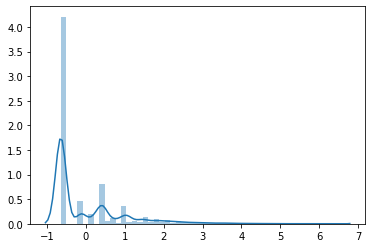

In [90]:
# スケーリング
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(all_df["応募数mean"].values.reshape(-1, 1))

sns.distplot(scaled)

## Label Encoding

In [91]:
from sklearn.preprocessing import LabelEncoder

cat_cols = list(all_df.dtypes[all_df.dtypes == "object"].index)
all_df_labeled = all_df.copy()

# Label Encoding
for col in cat_cols:
    le = LabelEncoder()
    all_df_labeled[col] = le.fit_transform(all_df_labeled[col].apply(lambda x: str(x)))

all_df_labeled.head()

,職場の様子,（紹介予定）入社後の雇用形態,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,短時間勤務OK(1日4h以内),駅から徒歩5分以内,学校・公的機関（官公庁）,土日祝のみ勤務,Wordのスキルを活かす,勤務地 最寄駅1（分）,お仕事No.,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,フラグオプション選択,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),社員食堂あり,（紹介予定）入社時期,10時以降出社OK,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,休日休暇(土曜日),（紹介予定）年収・給与例,休日休暇(木曜日),勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,休日休暇(金曜日),扶養控除内,給与/交通費 給与下限,オフィスが禁煙・分煙,勤務地 市区町村コード,（派遣先）職場の雰囲気,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,応募数mean,all_count,NaN_num,NaN_（紹介予定）入社後の雇用形態,NaN_（派遣先）配属先部署 男女比 男,NaN_勤務地 最寄駅2（駅名）,NaN_（紹介予定）雇用形態備考,NaN_（派遣先）配属先部署 人数,NaN_勤務地 最寄駅1（分）,NaN_勤務地 最寄駅2（沿線名）,NaN_（派遣先）概要 勤務先名（漢字）,NaN_勤務地 最寄駅2（駅からの交通手段）,NaN_（紹介予定）入社時期,NaN_（派遣先）勤務先写真ファイル名,NaN_（派遣先）概要 事業内容,NaN_（紹介予定）年収・給与例,NaN_勤務地 最寄駅1（沿線名）,NaN_（派遣先）配属先部署 平均年齢,NaN_給与/交通費 給与上限,NaN_勤務地 最寄駅1（駅からの交通手段）,NaN_（紹介予定）休日休暇,NaN_（派遣先）職場の雰囲気,NaN_（紹介予定）待遇・福利厚生,NaN_勤務地 最寄駅1（駅名）,NaN_勤務地 最寄駅2（分）,NaN_給与/交通費 備考,NaN_期間･時間 備考,勤務開始-掲載開始,workingstart,workingend,workingtime_m,workingrest,productiontime_m,お仕事名_pred,仕事内容_pred,お仕事のポイント_pred,（派遣先）配属先部署_pred
0,3,NaN,0,6.0,0,0,0,0,12.0,0,10,1,0,1,1,0,1,3.0,2203566799,1,0,0,0,0,0,0,NaN,138,1,3072,5,0,0,0,1,0,0,0,452,1,11,1,1,0,0,0,1,0,41,1,0,1,0,0,188,45.0,0,12,13,0,0,0,NaN,0,1,1.0,2741,0,0,0,1,0,1,0,1,3,0,0,1550,1,20,477,0,325,NaN,185,1,1.945910,1,14,1,0,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,0,1,0,1,0,0,40,25,22,420.0,60,360.0,0.976537,0.329747,0.353042,0.411839
1,3,1.0,0,2.0,566,1,7,0,33.0,0,0,1,0,1,0,0,1,1.0,2203546900,1,0,0,112,0,0,0,1.0,134,3,2078,5,1,0,0,1,0,1,0,415,1,11,1,1,4,0,0,1,0,0,1,0,1,1118,0,188,45.0,0,6,13,0,0,0,2000.0,0,0,1.0,4774,1,22,0,1,0,0,0,1,3,0,0,1800,1,0,185,65,832,5.0,423,1,3.623540,5,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,19,29,480.0,60,420.0,1.500810,1.371043,1.340081,0.331030
2,2,1.0,0,8.0,320,0,7,0,5.0,1,0,0,0,0,1,0,1,6.0,2203545344,0,0,0,191,0,0,0,1.0,134,3,2274,5,1,0,0,1,0,1,0,411,1,11,1,0,7,0,0,1,0,41,1,0,1,791,0,192,42.0,0,12,13,0,0,0,NaN,0,0,1.0,4675,1,34,0,1,0,1,0,1,3,0,0,1650,1,1,777,65,261,6.0,410,0,3.877241,5,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,-1,19,35,510.0,60,450.0,1.487396,1.426401,0.832140,0.609699
3,3,1.0,0,8.0,419,1,7,0,22.0,0,7,0,0,0,0,0,1,7.0,2203569493,1,0,0,167,0,0,0,1.0,134,3,2497,5,1,0,0,1,0,1,0,415,1,11,1,0,7,0,0,1,0,41,1,0,1,1162,0,155,42.0,0,1,13,0,0,0,1650.0,0,3,1.0,4685,1,28,0,1,0,1,0,1,3,0,0,1600,1,0,924,65,941,10.0,402,1,1.945910,1,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,19,38,520.0,60,460.0,0.621543,0.849950,0.752270,0.483499
4,3,NaN,0,6.0,92,0,0,0,9.0,0,10,1,0,0,1,0,1,12.0,2203556553,1,0,0,128,0,0,0,2.0,138,3,980,5,0,0,0,1,0,0,0,410,1,11,1,0,0,0,0,1,0,41,1,1,1,0,0,150,46.0,0,12,13,0,0,0,1650.0,0,1,1.0,2697,0,0,0,1,0,1,0,1,3,0,0,1600,1,11,608,0,773,15.0,324,1,2.564949,2,10,1,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,-1,13,22,480.0,60,420.0,0.741246,1.334786,0.498971,0.390314


## ダミー変数

In [92]:
all_df_dummies = pd.get_dummies(all_df)
all_df_dummies.shape

(13062, 16722)

## 予測モデル

In [157]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

### データ分割

In [158]:
#all_df = all_df.drop(columns=["お仕事No."])
train = all_df_labeled[all_df_labeled["応募数mean"].notnull()]
test = all_df_labeled[all_df_labeled["応募数mean"].isnull()].drop(columns=["応募数mean"])

X = train.drop(columns=["応募数mean"])
y = train["応募数mean"]

In [208]:
test

,職場の様子,（紹介予定）入社後の雇用形態,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,短時間勤務OK(1日4h以内),駅から徒歩5分以内,学校・公的機関（官公庁）,土日祝のみ勤務,Wordのスキルを活かす,勤務地 最寄駅1（分）,お仕事No.,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,フラグオプション選択,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),社員食堂あり,（紹介予定）入社時期,10時以降出社OK,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,休日休暇(土曜日),（紹介予定）年収・給与例,休日休暇(木曜日),勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,休日休暇(金曜日),扶養控除内,給与/交通費 給与下限,オフィスが禁煙・分煙,勤務地 市区町村コード,（派遣先）職場の雰囲気,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,all_count,NaN_num,NaN_（紹介予定）入社後の雇用形態,NaN_（派遣先）配属先部署 男女比 男,NaN_勤務地 最寄駅2（駅名）,NaN_（紹介予定）雇用形態備考,NaN_（派遣先）配属先部署 人数,NaN_勤務地 最寄駅1（分）,NaN_勤務地 最寄駅2（沿線名）,NaN_（派遣先）概要 勤務先名（漢字）,NaN_勤務地 最寄駅2（駅からの交通手段）,NaN_（紹介予定）入社時期,NaN_（派遣先）勤務先写真ファイル名,NaN_（派遣先）概要 事業内容,NaN_（紹介予定）年収・給与例,NaN_勤務地 最寄駅1（沿線名）,NaN_（派遣先）配属先部署 平均年齢,NaN_給与/交通費 給与上限,NaN_勤務地 最寄駅1（駅からの交通手段）,NaN_（紹介予定）休日休暇,NaN_（派遣先）職場の雰囲気,NaN_（紹介予定）待遇・福利厚生,NaN_勤務地 最寄駅1（駅名）,NaN_勤務地 最寄駅2（分）,NaN_給与/交通費 備考,NaN_期間･時間 備考,勤務開始-掲載開始,workingstart,workingend,workingtime_m,workingrest,productiontime_m,お仕事名_pred,仕事内容_pred,お仕事のポイント_pred,（派遣先）配属先部署_pred
9671,3,NaN,0,6.0,92,0,0,0,9.0,0,10,1,0,0,1,0,1,12.0,2203556553,1,0,0,128,0,0,0,2.0,138,3,980,5,0,0,0,1,0,0,0,410,1,11,1,0,0,0,0,1,0,41,1,1,1,0,0,150,46.0,0,12,13,0,0,0,1650.0,0,1,1.0,2697,0,0,0,1,0,1,0,1,3,0,0,1600,1,11,608,0,773,15.0,324,1,2,11,1,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,-1,13,22,480.0,60,420.0,0.741246,1.291132,0.498971,0.390314
9672,3,1.0,0,5.0,537,0,7,0,11.0,0,12,1,0,1,0,0,1,4.0,2203515280,1,0,0,115,0,0,0,1.0,134,3,2091,5,1,0,0,1,0,1,1,411,1,11,1,0,7,0,0,1,0,41,1,0,1,1171,0,192,35.0,0,6,13,0,0,0,1750.0,0,4,1.0,4792,1,22,0,1,0,1,0,1,3,0,0,1700,1,1,777,65,205,1.0,372,0,3,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,19,29,480.0,60,420.0,2.519523,0.815640,0.430694,0.405786
9673,3,1.0,0,2.0,566,1,7,0,33.0,0,0,1,0,1,0,0,1,1.0,2203546900,1,0,0,112,0,0,0,1.0,134,3,2078,5,1,0,0,1,0,1,0,415,1,11,1,1,4,0,0,1,0,41,1,0,1,1118,0,188,45.0,0,6,13,0,0,0,2000.0,0,0,1.0,4774,1,22,0,1,0,0,0,1,3,0,0,1800,1,0,185,65,832,5.0,423,1,5,4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,19,29,480.0,60,420.0,1.500810,1.331663,1.340081,0.331030
9674,2,1.0,0,8.0,320,0,7,0,5.0,1,0,0,0,0,1,0,1,6.0,2203545344,0,0,0,191,0,0,0,1.0,134,3,2274,5,1,0,0,1,0,1,0,411,1,11,1,0,7,0,0,1,0,41,1,0,1,791,0,192,42.0,0,12,13,0,0,0,NaN,0,0,1.0,4675,1,34,0,1,0,1,0,1,3,0,0,1650,1,1,777,65,261,6.0,410,0,5,4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,-1,19,35,510.0,60,450.0,1.487396,1.388151,0.832140,0.609699
9675,2,1.0,0,6.0,445,0,7,0,8.0,0,0,1,0,1,0,0,1,3.0,2203557987,0,0,0,191,0,0,0,1.0,134,3,2078,5,1,0,0,1,0,1,0,411,1,11,1,0,7,0,0,1,0,41,1,1,1,1088,0,194,NaN,0,6,13,0,0,0,NaN,0,2,1.0,5032,1,21,0,1,0,1,0,1,3,0,0,1700,1,1,773,65,1400,7.0,372,1,2,5,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,8,19,29,480.0,60,420.0,0.513427,0.675544,0.778314,0.411839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13057,3,NaN,0,NaN,548,0,0,0,NaN,0,0,0,0,0,0,0,1,7.0,2203538197,1,0,0,95,0,0,0,1.0,134,0,2816,5,0,0,0,1,0,0,0,451,1,11,1,0,0,0,0,1,0,41,1,0,1,0,0,193,NaN,0,4,13,0,0,0,NaN,0,4,1.0,843,0,0,0,1,0,1,0,1,3,0,0,1550,1,15,473,0,974,10.0,421,1,3,16,1,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,1,

### Lasso

In [160]:
# %%time
# # パイプライン
# pipe_la = make_pipeline(RobustScaler(), Lasso(alpha=1.0,
#                                               max_iter=10000,
#                                               random_state=10))

# # グリットサーチ
# param_grid = {"lasso__alpha": [0.1, 1, 10]}

# grid_pipe_la = GridSearchCV(pipe_la, param_grid=param_grid, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")
# grid_pipe_la.fit(X, y)

# # パラメータ、スコア
# print(grid_pipe_la.best_params_)
# print(np.sqrt(-(grid_pipe_la.best_score_))) # rmseを算出

### ElasticNet

In [161]:
# %%time
# # パイプライン
# pipe_enet = make_pipeline(RobustScaler(), ElasticNet(max_iter=10000,
#                                                      random_state=10))

# # グリットサーチ
# param_grid = {"elasticnet__alpha": [0.05, 0.1, 1],
#               "elasticnet__l1_ratio": [0.1, 0.5, 0.9]}

# grid_pipe_enet = GridSearchCV(pipe_enet, param_grid=param_grid, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")
# grid_pipe_enet.fit(X, y)

# # パラメータ、スコア
# print(grid_pipe_enet.best_params_)
# print(np.sqrt(-(grid_pipe_enet.best_score_))) # rmseを算出

### Xgboost

In [162]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

xgb_normal = xgb.XGBRegressor(objective="reg:squarederror", # デフォルト
                              n_estimators=5000,            # 決定木の数
                              learning_rate=0.05,
                              max_depth=3,
                              colsample_bytree=1.0,
                              colsample_bylevel=0.3,
                              subsample=0.9,
                              gamma=0,
                              reg_lambda=1,
                              reg_alpha=0,
                              min_child_weight=1,
                              random_state=10,
                              n_jobs=-1
                              )

xgb_normal.fit(X_train,
               y_train, 
               eval_metric='rmse',                              # 分析中にrmseで評価
               eval_set=[(X_train, y_train), (X_test, y_test)], # 分析中に評価に使うデータ
               early_stopping_rounds=200) 


[0]	validation_0-rmse:0.64076	validation_1-rmse:0.67284
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.63121	validation_1-rmse:0.66323
[2]	validation_0-rmse:0.62113	validation_1-rmse:0.65330
[3]	validation_0-rmse:0.61466	validation_1-rmse:0.64654
[4]	validation_0-rmse:0.60608	validation_1-rmse:0.63759
[5]	validation_0-rmse:0.60249	validation_1-rmse:0.63401
[6]	validation_0-rmse:0.59415	validation_1-rmse:0.62512
[7]	validation_0-rmse:0.58837	validation_1-rmse:0.61932
[8]	validation_0-rmse:0.58330	validation_1-rmse:0.61452
[9]	validation_0-rmse:0.57691	validation_1-rmse:0.60820
[10]	validation_0-rmse:0.57024	validation_1-rmse:0.60165
[11]	validation_0-rmse:0.56431	validation_1-rmse:0.59594
[12]	validation_0-rmse:0.55947	validation_1-rmse:0.59104
[13]	validation_0-rmse:0.55571	validation_1-rmse:0.58710
[14]	validation_0-rmse:0.55040	validation_1-rmse:0.5

[141]	validation_0-rmse:0.43425	validation_1-rmse:0.47363
[142]	validation_0-rmse:0.43410	validation_1-rmse:0.47350
[143]	validation_0-rmse:0.43386	validation_1-rmse:0.47318
[144]	validation_0-rmse:0.43362	validation_1-rmse:0.47297
[145]	validation_0-rmse:0.43350	validation_1-rmse:0.47274
[146]	validation_0-rmse:0.43325	validation_1-rmse:0.47258
[147]	validation_0-rmse:0.43305	validation_1-rmse:0.47246
[148]	validation_0-rmse:0.43280	validation_1-rmse:0.47225
[149]	validation_0-rmse:0.43251	validation_1-rmse:0.47210
[150]	validation_0-rmse:0.43230	validation_1-rmse:0.47206
[151]	validation_0-rmse:0.43206	validation_1-rmse:0.47193
[152]	validation_0-rmse:0.43177	validation_1-rmse:0.47171
[153]	validation_0-rmse:0.43154	validation_1-rmse:0.47155
[154]	validation_0-rmse:0.43134	validation_1-rmse:0.47141
[155]	validation_0-rmse:0.43117	validation_1-rmse:0.47130
[156]	validation_0-rmse:0.43090	validation_1-rmse:0.47112
[157]	validation_0-rmse:0.43070	validation_1-rmse:0.47108
[158]	validati

[283]	validation_0-rmse:0.41146	validation_1-rmse:0.46235
[284]	validation_0-rmse:0.41130	validation_1-rmse:0.46229
[285]	validation_0-rmse:0.41122	validation_1-rmse:0.46227
[286]	validation_0-rmse:0.41106	validation_1-rmse:0.46229
[287]	validation_0-rmse:0.41089	validation_1-rmse:0.46218
[288]	validation_0-rmse:0.41069	validation_1-rmse:0.46210
[289]	validation_0-rmse:0.41051	validation_1-rmse:0.46211
[290]	validation_0-rmse:0.41041	validation_1-rmse:0.46206
[291]	validation_0-rmse:0.41020	validation_1-rmse:0.46201
[292]	validation_0-rmse:0.40998	validation_1-rmse:0.46211
[293]	validation_0-rmse:0.40991	validation_1-rmse:0.46212
[294]	validation_0-rmse:0.40980	validation_1-rmse:0.46210
[295]	validation_0-rmse:0.40958	validation_1-rmse:0.46215
[296]	validation_0-rmse:0.40941	validation_1-rmse:0.46200
[297]	validation_0-rmse:0.40926	validation_1-rmse:0.46194
[298]	validation_0-rmse:0.40912	validation_1-rmse:0.46193
[299]	validation_0-rmse:0.40898	validation_1-rmse:0.46191
[300]	validati

[425]	validation_0-rmse:0.39451	validation_1-rmse:0.45900
[426]	validation_0-rmse:0.39442	validation_1-rmse:0.45901
[427]	validation_0-rmse:0.39428	validation_1-rmse:0.45895
[428]	validation_0-rmse:0.39414	validation_1-rmse:0.45893
[429]	validation_0-rmse:0.39399	validation_1-rmse:0.45887
[430]	validation_0-rmse:0.39389	validation_1-rmse:0.45890
[431]	validation_0-rmse:0.39378	validation_1-rmse:0.45890
[432]	validation_0-rmse:0.39360	validation_1-rmse:0.45871
[433]	validation_0-rmse:0.39354	validation_1-rmse:0.45875
[434]	validation_0-rmse:0.39341	validation_1-rmse:0.45877
[435]	validation_0-rmse:0.39332	validation_1-rmse:0.45878
[436]	validation_0-rmse:0.39320	validation_1-rmse:0.45873
[437]	validation_0-rmse:0.39313	validation_1-rmse:0.45873
[438]	validation_0-rmse:0.39300	validation_1-rmse:0.45861
[439]	validation_0-rmse:0.39287	validation_1-rmse:0.45860
[440]	validation_0-rmse:0.39280	validation_1-rmse:0.45857
[441]	validation_0-rmse:0.39273	validation_1-rmse:0.45859
[442]	validati

[567]	validation_0-rmse:0.38201	validation_1-rmse:0.45741
[568]	validation_0-rmse:0.38191	validation_1-rmse:0.45743
[569]	validation_0-rmse:0.38178	validation_1-rmse:0.45741
[570]	validation_0-rmse:0.38157	validation_1-rmse:0.45736
[571]	validation_0-rmse:0.38153	validation_1-rmse:0.45734
[572]	validation_0-rmse:0.38148	validation_1-rmse:0.45734
[573]	validation_0-rmse:0.38136	validation_1-rmse:0.45737
[574]	validation_0-rmse:0.38126	validation_1-rmse:0.45741
[575]	validation_0-rmse:0.38116	validation_1-rmse:0.45739
[576]	validation_0-rmse:0.38102	validation_1-rmse:0.45748
[577]	validation_0-rmse:0.38099	validation_1-rmse:0.45746
[578]	validation_0-rmse:0.38089	validation_1-rmse:0.45740
[579]	validation_0-rmse:0.38084	validation_1-rmse:0.45741
[580]	validation_0-rmse:0.38077	validation_1-rmse:0.45736
[581]	validation_0-rmse:0.38070	validation_1-rmse:0.45738
[582]	validation_0-rmse:0.38065	validation_1-rmse:0.45737
[583]	validation_0-rmse:0.38055	validation_1-rmse:0.45742
[584]	validati

[709]	validation_0-rmse:0.37007	validation_1-rmse:0.45690
[710]	validation_0-rmse:0.36997	validation_1-rmse:0.45697
[711]	validation_0-rmse:0.36995	validation_1-rmse:0.45697
[712]	validation_0-rmse:0.36977	validation_1-rmse:0.45694
[713]	validation_0-rmse:0.36969	validation_1-rmse:0.45694
[714]	validation_0-rmse:0.36962	validation_1-rmse:0.45692
[715]	validation_0-rmse:0.36951	validation_1-rmse:0.45695
[716]	validation_0-rmse:0.36943	validation_1-rmse:0.45701
[717]	validation_0-rmse:0.36934	validation_1-rmse:0.45701
[718]	validation_0-rmse:0.36930	validation_1-rmse:0.45702
[719]	validation_0-rmse:0.36921	validation_1-rmse:0.45694
[720]	validation_0-rmse:0.36913	validation_1-rmse:0.45699
[721]	validation_0-rmse:0.36904	validation_1-rmse:0.45699
[722]	validation_0-rmse:0.36897	validation_1-rmse:0.45700
[723]	validation_0-rmse:0.36884	validation_1-rmse:0.45698
[724]	validation_0-rmse:0.36877	validation_1-rmse:0.45696
[725]	validation_0-rmse:0.36862	validation_1-rmse:0.45693
[726]	validati

[851]	validation_0-rmse:0.35933	validation_1-rmse:0.45648
[852]	validation_0-rmse:0.35929	validation_1-rmse:0.45643
[853]	validation_0-rmse:0.35923	validation_1-rmse:0.45642
[854]	validation_0-rmse:0.35918	validation_1-rmse:0.45646
[855]	validation_0-rmse:0.35913	validation_1-rmse:0.45642
[856]	validation_0-rmse:0.35911	validation_1-rmse:0.45644
[857]	validation_0-rmse:0.35907	validation_1-rmse:0.45644
[858]	validation_0-rmse:0.35897	validation_1-rmse:0.45647
[859]	validation_0-rmse:0.35891	validation_1-rmse:0.45649
[860]	validation_0-rmse:0.35881	validation_1-rmse:0.45644
[861]	validation_0-rmse:0.35878	validation_1-rmse:0.45646
[862]	validation_0-rmse:0.35872	validation_1-rmse:0.45640
[863]	validation_0-rmse:0.35868	validation_1-rmse:0.45639
[864]	validation_0-rmse:0.35860	validation_1-rmse:0.45646
[865]	validation_0-rmse:0.35850	validation_1-rmse:0.45635
[866]	validation_0-rmse:0.35842	validation_1-rmse:0.45636
[867]	validation_0-rmse:0.35832	validation_1-rmse:0.45634
[868]	validati

[993]	validation_0-rmse:0.34996	validation_1-rmse:0.45661
[994]	validation_0-rmse:0.34988	validation_1-rmse:0.45661
[995]	validation_0-rmse:0.34981	validation_1-rmse:0.45653
[996]	validation_0-rmse:0.34973	validation_1-rmse:0.45653
[997]	validation_0-rmse:0.34968	validation_1-rmse:0.45655
[998]	validation_0-rmse:0.34960	validation_1-rmse:0.45646
[999]	validation_0-rmse:0.34956	validation_1-rmse:0.45646
[1000]	validation_0-rmse:0.34952	validation_1-rmse:0.45644
[1001]	validation_0-rmse:0.34945	validation_1-rmse:0.45643
[1002]	validation_0-rmse:0.34937	validation_1-rmse:0.45647
[1003]	validation_0-rmse:0.34933	validation_1-rmse:0.45647
[1004]	validation_0-rmse:0.34926	validation_1-rmse:0.45646
[1005]	validation_0-rmse:0.34919	validation_1-rmse:0.45649
[1006]	validation_0-rmse:0.34914	validation_1-rmse:0.45649
[1007]	validation_0-rmse:0.34907	validation_1-rmse:0.45651
[1008]	validation_0-rmse:0.34897	validation_1-rmse:0.45653
[1009]	validation_0-rmse:0.34888	validation_1-rmse:0.45647
[101

[1132]	validation_0-rmse:0.34139	validation_1-rmse:0.45646
[1133]	validation_0-rmse:0.34137	validation_1-rmse:0.45646
[1134]	validation_0-rmse:0.34131	validation_1-rmse:0.45645
[1135]	validation_0-rmse:0.34125	validation_1-rmse:0.45644
[1136]	validation_0-rmse:0.34119	validation_1-rmse:0.45642
[1137]	validation_0-rmse:0.34112	validation_1-rmse:0.45640
[1138]	validation_0-rmse:0.34109	validation_1-rmse:0.45644
[1139]	validation_0-rmse:0.34106	validation_1-rmse:0.45644
[1140]	validation_0-rmse:0.34100	validation_1-rmse:0.45644
[1141]	validation_0-rmse:0.34093	validation_1-rmse:0.45646
[1142]	validation_0-rmse:0.34085	validation_1-rmse:0.45641
[1143]	validation_0-rmse:0.34079	validation_1-rmse:0.45641
[1144]	validation_0-rmse:0.34074	validation_1-rmse:0.45638
[1145]	validation_0-rmse:0.34070	validation_1-rmse:0.45640
[1146]	validation_0-rmse:0.34065	validation_1-rmse:0.45640
[1147]	validation_0-rmse:0.34060	validation_1-rmse:0.45643
[1148]	validation_0-rmse:0.34057	validation_1-rmse:0.456

[1271]	validation_0-rmse:0.33345	validation_1-rmse:0.45641
[1272]	validation_0-rmse:0.33339	validation_1-rmse:0.45641
[1273]	validation_0-rmse:0.33332	validation_1-rmse:0.45643
[1274]	validation_0-rmse:0.33326	validation_1-rmse:0.45647
[1275]	validation_0-rmse:0.33319	validation_1-rmse:0.45646
[1276]	validation_0-rmse:0.33314	validation_1-rmse:0.45643
[1277]	validation_0-rmse:0.33309	validation_1-rmse:0.45645
[1278]	validation_0-rmse:0.33301	validation_1-rmse:0.45645
[1279]	validation_0-rmse:0.33293	validation_1-rmse:0.45642
[1280]	validation_0-rmse:0.33288	validation_1-rmse:0.45642
[1281]	validation_0-rmse:0.33281	validation_1-rmse:0.45640
[1282]	validation_0-rmse:0.33275	validation_1-rmse:0.45644
[1283]	validation_0-rmse:0.33269	validation_1-rmse:0.45650
[1284]	validation_0-rmse:0.33262	validation_1-rmse:0.45644
[1285]	validation_0-rmse:0.33256	validation_1-rmse:0.45648
[1286]	validation_0-rmse:0.33253	validation_1-rmse:0.45647
[1287]	validation_0-rmse:0.33248	validation_1-rmse:0.456

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=0.3,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=5000, n_jobs=-1, num_parallel_tree=1, random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method=None, validate_parameters=False, verbosity=None)

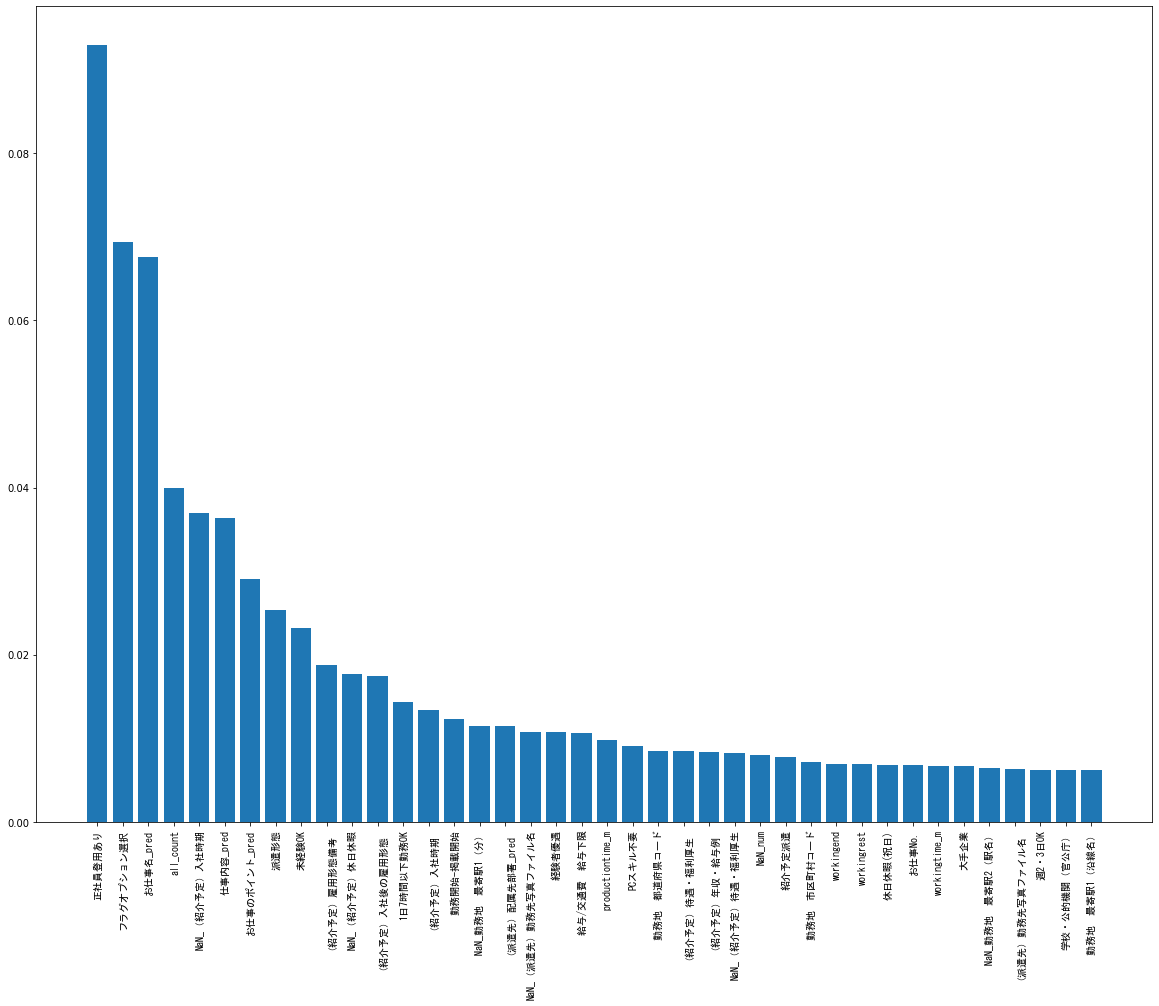

In [176]:
# 特徴量の重要度を抽出
importances = xgb_normal.feature_importances_
# 重要度の降順で元のインデックスを抽出
indices_xgb = np.argsort(importances)[::-1]

# 上位40個の重要度
indices_selected = indices_xgb[:40]
# 特徴量の重要度をプロット
plt.figure(figsize=(20,15))
plt.bar(range(indices_selected.shape[0]), importances[indices_selected])
plt.xticks(range(indices_selected.shape[0]), X.columns[indices_selected],
           rotation=90, fontname="MS Gothic")
plt.show()

In [164]:
# GBの交差検証(rmse)

def cv_score(model):
    scores = []
    kfold = KFold(n_splits=5, shuffle=True, random_state=71)
    for train_id, valid_id in kfold.split(X):
        train_X, valid_X = X.iloc[train_id], X.iloc[valid_id]
        train_y, valid_y = y.iloc[train_id], y.iloc[valid_id]

        # さらにeval_setに使うデータを分割
        train_X, test_X, train_y, test_y = train_test_split(train_X, train_y, random_state=12) 

        # 学習の実行、
        model.fit(train_X,
                  train_y, 
                  eval_metric='rmse',                             
                  eval_set=[(test_X, test_y)], 
                  early_stopping_rounds=100,
                  verbose=False
                  ) 
        # バリデーションデータの予測値の出力
        valid_pred = model.predict(valid_X)
        # スコアの計算・格納
        score = np.sqrt(mean_squared_error(valid_y, valid_pred))
        scores.append(score)

    # 各foldのスコア
    print(scores)
    print(np.mean(scores))

In [165]:
cv_score(xgb_normal)

[0.45145551475189094, 0.4541393345760173, 0.45615993149106715, 0.46101043021879956, 0.4503117804736582]
0.4546153983022866


In [166]:
0.6003345223628277
0.5121578449113129
0.513914892024984
0.511099742643091
0.5232853452132573
0.45611926554667603
0.4546153983022866

0.45611926554667603

### LightGBM

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lgb_normal = lgb.LGBMRegressor(objective="regression", 
                               n_estimators=3000,
                               learning_rate=0.05,
                               num_leaves=116, 
                               max_depth=-1,
                               subsample=0.8,
                               subsample_freq=5,
                               colsample_bytree=0.2319,
                               #feature_fraction_seed=9,
                               #bagging_seed=9,
                               min_child_samples=20,
                               min_child_weight=1,
                               reg_lambda=1,
                               reg_alpha=0,
                               random_state=10,
                               n_jobs=-1
                               )

lgb_normal.fit(X_train,
               y_train, 
               eval_metric='rmse',                              # 分析中にrmseで評価
               eval_set=[(X_train, y_train), (X_test, y_test)], # 分析中に評価に使うデータ
               early_stopping_rounds=200)

[1]	training's rmse: 0.648692	training's l2: 0.420802	valid_1's rmse: 0.631018	valid_1's l2: 0.398183
Training until validation scores don't improve for 200 rounds
[2]	training's rmse: 0.636251	training's l2: 0.404815	valid_1's rmse: 0.620491	valid_1's l2: 0.385009
[3]	training's rmse: 0.626257	training's l2: 0.392198	valid_1's rmse: 0.612907	valid_1's l2: 0.375655
[4]	training's rmse: 0.616062	training's l2: 0.379532	valid_1's rmse: 0.605597	valid_1's l2: 0.366748
[5]	training's rmse: 0.607015	training's l2: 0.368467	valid_1's rmse: 0.59863	valid_1's l2: 0.358358
[6]	training's rmse: 0.598253	training's l2: 0.357906	valid_1's rmse: 0.59265	valid_1's l2: 0.351234
[7]	training's rmse: 0.590922	training's l2: 0.349188	valid_1's rmse: 0.588639	valid_1's l2: 0.346496
[8]	training's rmse: 0.579785	training's l2: 0.33615	valid_1's rmse: 0.579244	valid_1's l2: 0.335524
[9]	training's rmse: 0.574163	training's l2: 0.329663	valid_1's rmse: 0.576258	valid_1's l2: 0.332074
[10]	training's rmse: 0

[85]	training's rmse: 0.324088	training's l2: 0.105033	valid_1's rmse: 0.457148	valid_1's l2: 0.208984
[86]	training's rmse: 0.322883	training's l2: 0.104254	valid_1's rmse: 0.457206	valid_1's l2: 0.209038
[87]	training's rmse: 0.321136	training's l2: 0.103129	valid_1's rmse: 0.45664	valid_1's l2: 0.208521
[88]	training's rmse: 0.319527	training's l2: 0.102098	valid_1's rmse: 0.456167	valid_1's l2: 0.208088
[89]	training's rmse: 0.317783	training's l2: 0.100986	valid_1's rmse: 0.455618	valid_1's l2: 0.207588
[90]	training's rmse: 0.316152	training's l2: 0.0999518	valid_1's rmse: 0.455262	valid_1's l2: 0.207263
[91]	training's rmse: 0.314339	training's l2: 0.0988093	valid_1's rmse: 0.454971	valid_1's l2: 0.206998
[92]	training's rmse: 0.31278	training's l2: 0.0978313	valid_1's rmse: 0.454815	valid_1's l2: 0.206857
[93]	training's rmse: 0.311522	training's l2: 0.0970462	valid_1's rmse: 0.454638	valid_1's l2: 0.206695
[94]	training's rmse: 0.309996	training's l2: 0.0960978	valid_1's rmse:

[172]	training's rmse: 0.228979	training's l2: 0.0524315	valid_1's rmse: 0.447047	valid_1's l2: 0.199851
[173]	training's rmse: 0.228419	training's l2: 0.0521751	valid_1's rmse: 0.446937	valid_1's l2: 0.199753
[174]	training's rmse: 0.227517	training's l2: 0.0517638	valid_1's rmse: 0.446937	valid_1's l2: 0.199752
[175]	training's rmse: 0.226793	training's l2: 0.0514348	valid_1's rmse: 0.446971	valid_1's l2: 0.199783
[176]	training's rmse: 0.226227	training's l2: 0.0511785	valid_1's rmse: 0.446987	valid_1's l2: 0.199797
[177]	training's rmse: 0.225417	training's l2: 0.0508129	valid_1's rmse: 0.44696	valid_1's l2: 0.199773
[178]	training's rmse: 0.224806	training's l2: 0.0505379	valid_1's rmse: 0.44698	valid_1's l2: 0.199791
[179]	training's rmse: 0.223954	training's l2: 0.0501556	valid_1's rmse: 0.447107	valid_1's l2: 0.199905
[180]	training's rmse: 0.223268	training's l2: 0.0498486	valid_1's rmse: 0.447063	valid_1's l2: 0.199865
[181]	training's rmse: 0.222591	training's l2: 0.0495467	

[254]	training's rmse: 0.17424	training's l2: 0.0303596	valid_1's rmse: 0.445683	valid_1's l2: 0.198633
[255]	training's rmse: 0.173516	training's l2: 0.0301079	valid_1's rmse: 0.445649	valid_1's l2: 0.198603
[256]	training's rmse: 0.172835	training's l2: 0.0298719	valid_1's rmse: 0.445713	valid_1's l2: 0.19866
[257]	training's rmse: 0.17236	training's l2: 0.0297078	valid_1's rmse: 0.445677	valid_1's l2: 0.198628
[258]	training's rmse: 0.171788	training's l2: 0.0295113	valid_1's rmse: 0.445642	valid_1's l2: 0.198597
[259]	training's rmse: 0.171296	training's l2: 0.0293422	valid_1's rmse: 0.445621	valid_1's l2: 0.198578
[260]	training's rmse: 0.170697	training's l2: 0.0291373	valid_1's rmse: 0.445594	valid_1's l2: 0.198554
[261]	training's rmse: 0.170216	training's l2: 0.0289736	valid_1's rmse: 0.445611	valid_1's l2: 0.198569
[262]	training's rmse: 0.169685	training's l2: 0.0287928	valid_1's rmse: 0.44559	valid_1's l2: 0.198551
[263]	training's rmse: 0.169155	training's l2: 0.0286134	va

[335]	training's rmse: 0.136981	training's l2: 0.0187638	valid_1's rmse: 0.446527	valid_1's l2: 0.199386
[336]	training's rmse: 0.13661	training's l2: 0.0186624	valid_1's rmse: 0.44656	valid_1's l2: 0.199416
[337]	training's rmse: 0.136131	training's l2: 0.0185317	valid_1's rmse: 0.446578	valid_1's l2: 0.199432
[338]	training's rmse: 0.135664	training's l2: 0.0184047	valid_1's rmse: 0.446679	valid_1's l2: 0.199522
[339]	training's rmse: 0.13529	training's l2: 0.0183035	valid_1's rmse: 0.446719	valid_1's l2: 0.199558
[340]	training's rmse: 0.134961	training's l2: 0.0182144	valid_1's rmse: 0.44671	valid_1's l2: 0.19955
[341]	training's rmse: 0.134584	training's l2: 0.018113	valid_1's rmse: 0.44675	valid_1's l2: 0.199585
[342]	training's rmse: 0.13423	training's l2: 0.0180176	valid_1's rmse: 0.446705	valid_1's l2: 0.199545
[343]	training's rmse: 0.133848	training's l2: 0.0179153	valid_1's rmse: 0.446711	valid_1's l2: 0.199551
[344]	training's rmse: 0.133353	training's l2: 0.0177831	valid_

[428]	training's rmse: 0.104892	training's l2: 0.0110022	valid_1's rmse: 0.448004	valid_1's l2: 0.200708
[429]	training's rmse: 0.1046	training's l2: 0.0109412	valid_1's rmse: 0.448009	valid_1's l2: 0.200712
[430]	training's rmse: 0.104342	training's l2: 0.0108872	valid_1's rmse: 0.448012	valid_1's l2: 0.200715
[431]	training's rmse: 0.104003	training's l2: 0.0108167	valid_1's rmse: 0.448004	valid_1's l2: 0.200708
[432]	training's rmse: 0.103717	training's l2: 0.0107572	valid_1's rmse: 0.447988	valid_1's l2: 0.200693
[433]	training's rmse: 0.103498	training's l2: 0.0107119	valid_1's rmse: 0.447979	valid_1's l2: 0.200685
[434]	training's rmse: 0.103161	training's l2: 0.0106423	valid_1's rmse: 0.447935	valid_1's l2: 0.200646
[435]	training's rmse: 0.102959	training's l2: 0.0106005	valid_1's rmse: 0.447939	valid_1's l2: 0.20065
[436]	training's rmse: 0.102648	training's l2: 0.0105366	valid_1's rmse: 0.447921	valid_1's l2: 0.200633
[437]	training's rmse: 0.102341	training's l2: 0.0104737	v

LGBMRegressor(colsample_bytree=0.2319, learning_rate=0.05, min_child_weight=1,
              n_estimators=3000, num_leaves=116, objective='regression',
              random_state=10, reg_alpha=0, reg_lambda=1, subsample=0.8,
              subsample_freq=5)

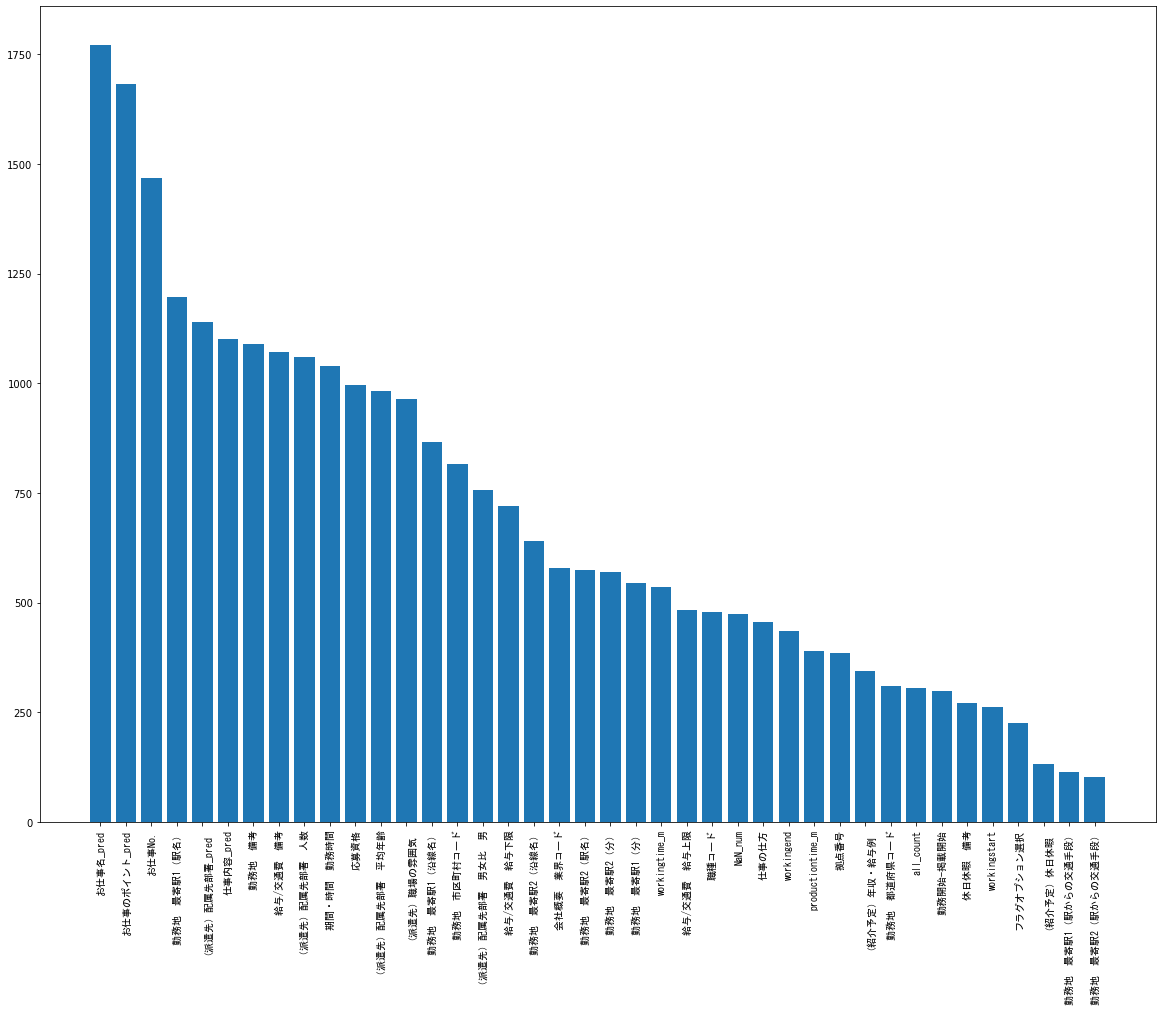

In [178]:
# 特徴量の重要度を抽出
importances = lgb_normal.feature_importances_
# 重要度の降順で元のインデックスを抽出
indices_xgb = np.argsort(importances)[::-1]

# 上位40個の重要度
indices_selected = indices_xgb[:40]
# 特徴量の重要度をプロット
plt.figure(figsize=(20,15))
plt.bar(range(indices_selected.shape[0]), importances[indices_selected])
plt.xticks(range(indices_selected.shape[0]), X.columns[indices_selected],
           rotation=90, fontname="MS Gothic")
plt.show()

In [179]:
%%time
cv_score(lgb_normal)

[0.461757591539968, 0.45776342310501716, 0.4640355011784698, 0.46714944245216594, 0.4591732506316018]
0.46197584178144463
Wall time: 25.8 s


In [170]:
0.4946983584136084
0.5061034461994419
0.5046027857087674
0.46197584178144463

0.46197584178144463

## pickle

In [180]:
import pickle
with open("xgb_model.pickle", mode="wb") as f:
    pickle.dump(xgb_normal, f)
with open("lgb_model.pickle", mode="wb") as f:
    pickle.dump(lgb_normal, f)


## アンサンブル

In [181]:
with open("xgb_model.pickle", mode="rb") as ff:
    xgb_model = pickle.load(ff)
with open("lgb_model.pickle", mode="rb") as ff:
    lgb_model = pickle.load(ff)
        

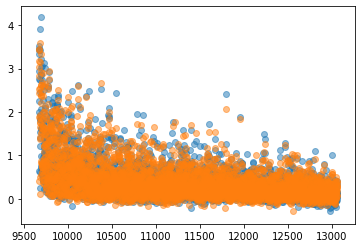

In [182]:
plt.scatter(test.index, xgb_model.predict(test), alpha=0.5)
plt.scatter(test.index, lgb_model.predict(test), alpha=0.5)

In [183]:
pred_an = xgb_model.predict(test)*0.5 + lgb_model.predict(test)*0.5
pred_an

array([1.94285206, 3.39358051, 3.35882731, ..., 0.34753029, 0.18407077,
       0.07232542])

In [184]:
pred_df = pd.DataFrame({"お仕事No.": test_x["お仕事No."], "応募数 合計": pred_an})
pred_df
#pred_df.to_csv("submission.csv", index=False, encoding='utf_8_sig')

,お仕事No.,応募数 合計
0,2203556553,1.942852
1,2203515280,3.393581
2,2203546900,3.358827
3,2203545344,2.652310
4,2203557987,0.527196
...,...,...
3386,2203538197,0.122080
3387,2203544067,0.237745
3388,2203557301,0.347530
3389,2203506336,0.184071


## リーク
value_counts=3のやつはtrainデータとtestデータに同じお仕事No.が必ずある

value_counts=2のやつも同じお仕事No.があるかも

In [185]:
# テストデータの"応募数mean"の"お仕事No."ごとの平均値を予測値とする
leak_df = all_df_labeled.copy() 
# np.nanmean: 欠損値を省いて計算できる
leak_df['応募数 合計'] = leak_df.groupby(["お仕事No."])["応募数mean"].transform(np.nanmean)

In [186]:
test_df = leak_df.iloc[len(train):, :]

leaked_test = test_df[test_df["応募数 合計"].notnull()].drop(columns=["応募数mean"])
noleaked_test = test_df[test_df["応募数 合計"].isnull()].drop(columns=["応募数mean","応募数 合計"])

leaked_test.shape

(2087, 124)

In [189]:
noleaked_test2 = noleaked_test.copy()
noleaked_test2["応募数 合計"] = xgb_model.predict(noleaked_test)*0.5 + lgb_model.predict(noleaked_test)*0.5

In [193]:
noleaked_test2["応募数 合計"] 

9680     1.301876
9687     0.559505
9700     0.655381
9701     0.770658
9706     1.608582
9708     1.684016
9713     0.706440
9716     0.494327
9717     0.464555
9719     0.916224
9720     0.420045
9723     0.545667
9733     0.368892
9734     0.796983
9740     0.795588
9741     1.285684
9744     1.821668
9749     0.210190
9752     0.257570
9753     0.247566
9760     0.301144
9761     0.528043
9765     0.551571
9767     0.921438
9768     0.620163
9770     0.409743
9772     0.439926
9784     0.454998
9786     0.344450
9787     0.645245
9797     0.418272
9798     0.952257
9809     0.857132
9810     0.763858
9815     0.090975
9819     0.376378
9828     0.449854
9829     0.080441
9830     1.007394
9832     0.209318
9833     0.462669
9845     0.933653
9849     0.198031
9851     0.560408
9852     1.392963
9854     0.449186
9858     0.484693
9860     0.463352
9862     0.629750
9870     1.288916
9872     0.689163
9879     0.580511
9882     0.295739
9888     0.622904
9891     0.771056
9892     0

In [197]:
leak_df = pd.concat([leaked_test, noleaked_test2], sort=True)

leak_df[["お仕事No.", "応募数 合計"]]

,お仕事No.,応募数 合計
9671,2203556553,2.564949
9672,2203515280,4.306978
9673,2203546900,3.623540
9674,2203545344,3.877241
9675,2203557987,0.693147
...,...,...
13056,2203552921,0.057673
13058,2203544067,0.237745
13059,2203557301,0.347530
13060,2203506336,0.184071


In [198]:
# リークと予測値の平均をとる
pred = leak_df["応募数 合計"].values*0.5 + pred_df["応募数 合計"].values*0.5
submission_leaked = pd.DataFrame({"お仕事No.": test_x["お仕事No."].values, "応募数 合計": pred})

submission_leaked.to_csv("submission.csv", index=False, encoding='utf_8_sig')

In [204]:
# 予測とリークの比較
pd.set_option('display.max_rows', 3000)
pd.DataFrame({"pred": pred_df["応募数 合計"].values,
              "leaked": leak_df["応募数 合計"].values
             })

,pred,leaked
0,1.942852,2.564949
1,3.393581,4.306978
2,3.358827,3.623540
3,2.652310,3.877241
4,0.527196,0.693147
...,...,...
3386,0.122080,0.057673
3387,0.237745,0.237745
3388,0.347530,0.347530
3389,0.184071,0.184071


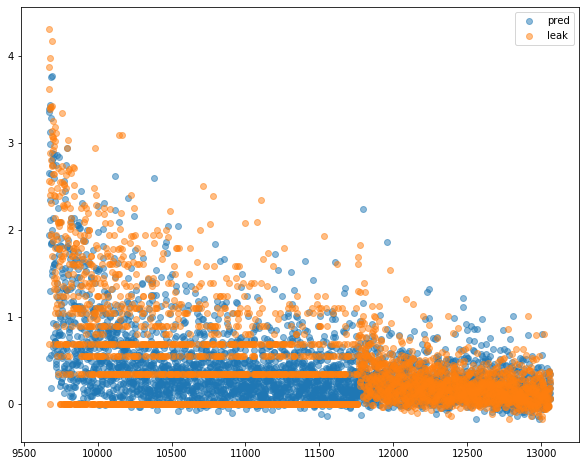

In [207]:
plt.figure(figsize=(10, 8))
plt.scatter(test.index, pred_df["応募数 合計"].values, alpha=0.5)
plt.scatter(test.index, leak_df["応募数 合計"].values, alpha=0.5)
plt.legend(["pred", "leak"])

In [ ]:
# 予測とリークの比較
pd.set_option('display.max_rows', 4000)
pd.DataFrame({"pred": model.predict(leaked_test.drop(columns=["応募数 合計"])),
              "test_df": test_df["応募数 合計"]
             })

In [ ]:
np.sqrt(mean_squared_error(model.predict(test),
                           test_df["応募数 合計"]
                          )
       )